# Importing modules

In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell
from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (20, 8.0)
label_size = 14
matplotlib.rcParams['xtick.labelsize'] = label_size 

# Loading dataset

To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey).

In [5]:
df =  pd.read_csv('./2017/us/data/cleaned_data.csv')

The total of participant after cleaning the dataset. Remove all participants that have not completed the survey passed the first pages and all participants who are not from the country

In [6]:
len(df)

164

# Section 1. Social demographics
In this section, we determine some information about the demographics of the respondents: country of work, gender, age, salary, educational level.

## Country of work
The data was cleaned to remove all participants that were not working in United States of America

### In which country do you work?

In [7]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../survey_creation/2017/us/listAnswers/countries.csv", "False", "./2017/us/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which country do you work?                   
United States                    164       100.0

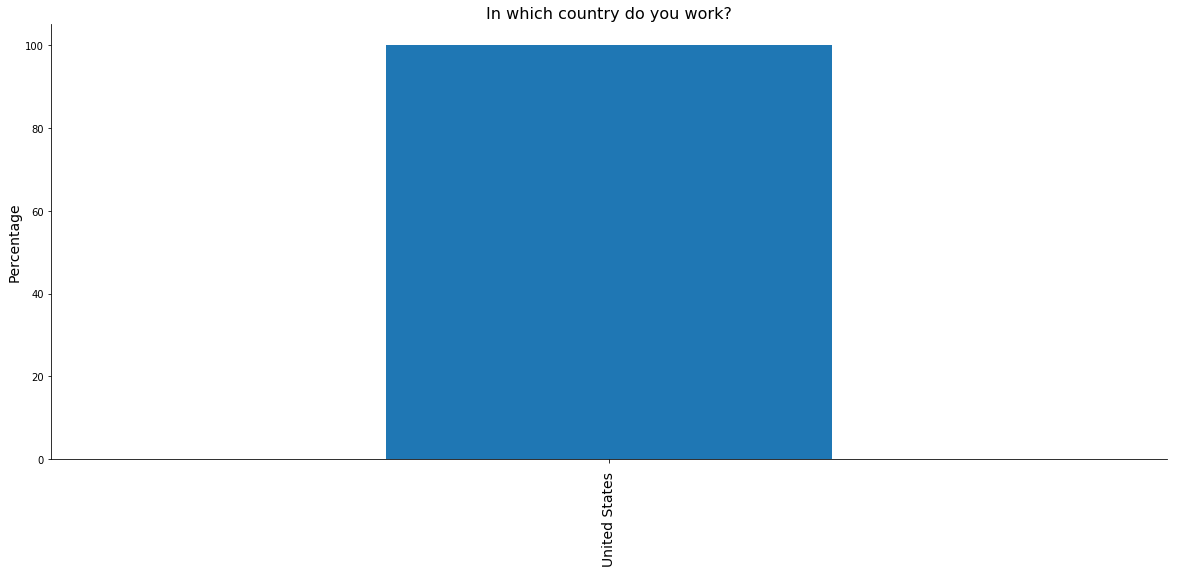

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Gender

Their is a clear gender imbalance in the RSE community in Germany. It is predominately *male* (82%). Only 14% of the participants describe their gender as *female*, while 4% *prefer not to say*.

### Please select your gender

In [11]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../survey_creation/2017/us/listAnswers/gender.csv", "False", "./2017/us/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your gender                   
Male                         115        82.0
Female                        19        14.0
Prefer not to say              6         4.0
NaN                           24         NaN

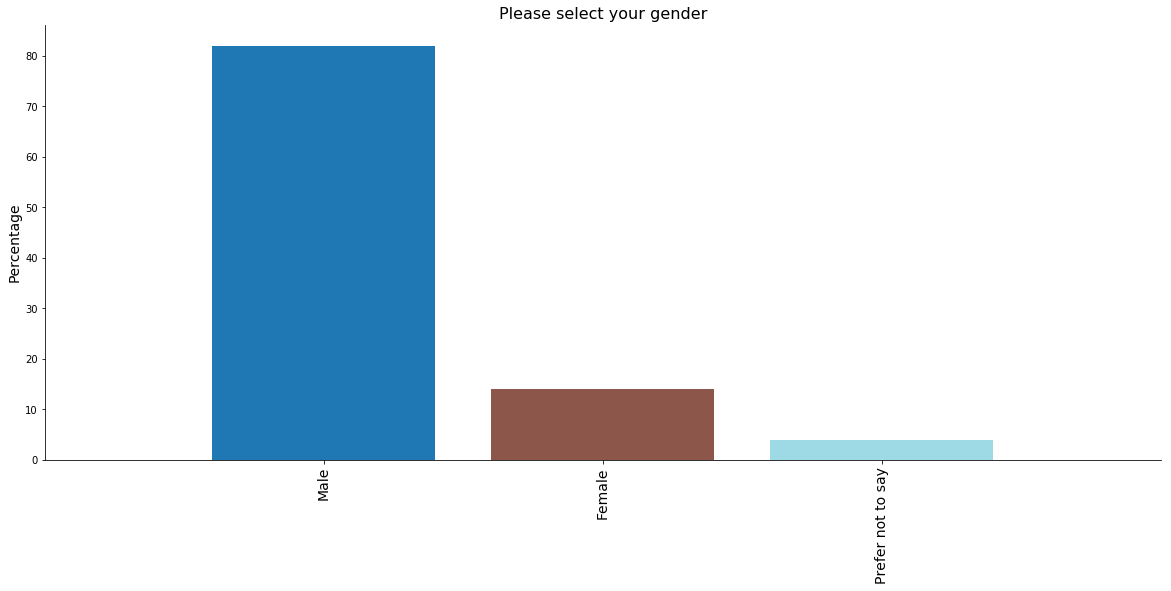

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Age

The majority of RSEs fall within the *25 to 34 years* (53%), and the next more important age range is *35 to 44 years* (31%). The representation of older or younger range is marginal compared to these two groups (16% in total, split in three age ranges).

### Please select your age

In [15]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../survey_creation/2017/us/listAnswers/age.csv", "True", "./2017/us/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your age                   
18 to 24 years              2         1.0
25 to 34 years             53        38.0
35 to 44 years             44        31.0
45 to 54 years             28        20.0
55 to 64 years             12         9.0
Age 65 or older             1         1.0
NaN                        24         NaN

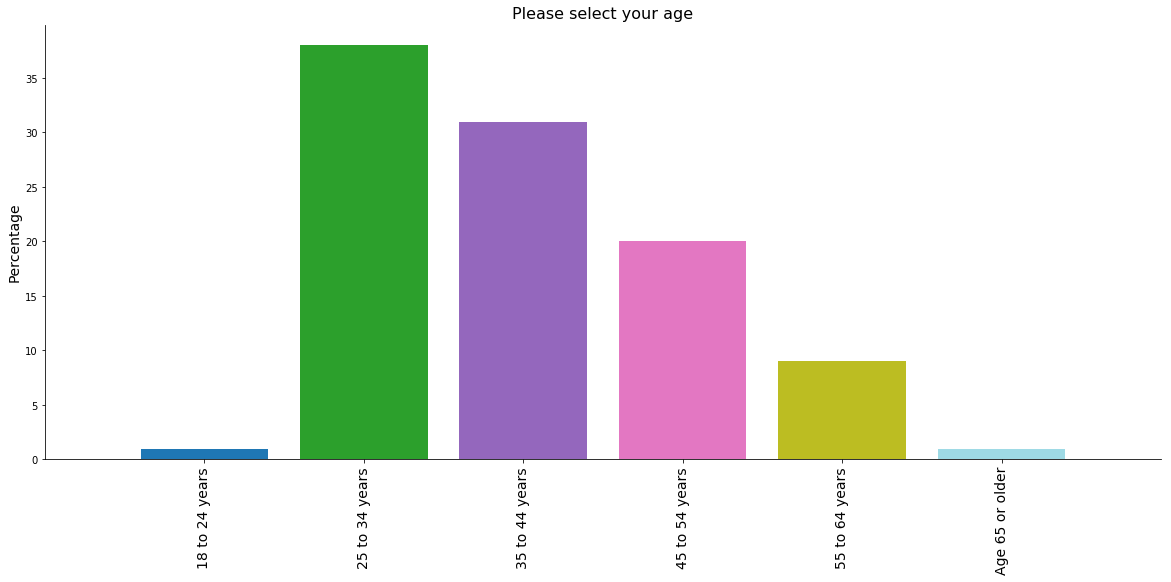

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Ethnic origin

The RSEs are in majority *White* (77%) compared to the other ethnic origins. The second largest group is the *Asian* (11%), followed by *Hispanic, Latino, or Spanish origin* (6%)

### How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality.

In [19]:
v_to_count, filename  = get_count(df, ['socio5. How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality.'], "one choice", "./../survey_creation/2017/us/listAnswers/ethnicity.csv", "False", "./2017/us/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How would you describe your ethnic origin? This...                   
White                                                 101        77.0
Asian                                                  14        11.0
Hispanic, Latino, or Spanish origin                     8         6.0
Other                                                   6         5.0
Black or African American                               2         2.0
NaN                                                    33         NaN

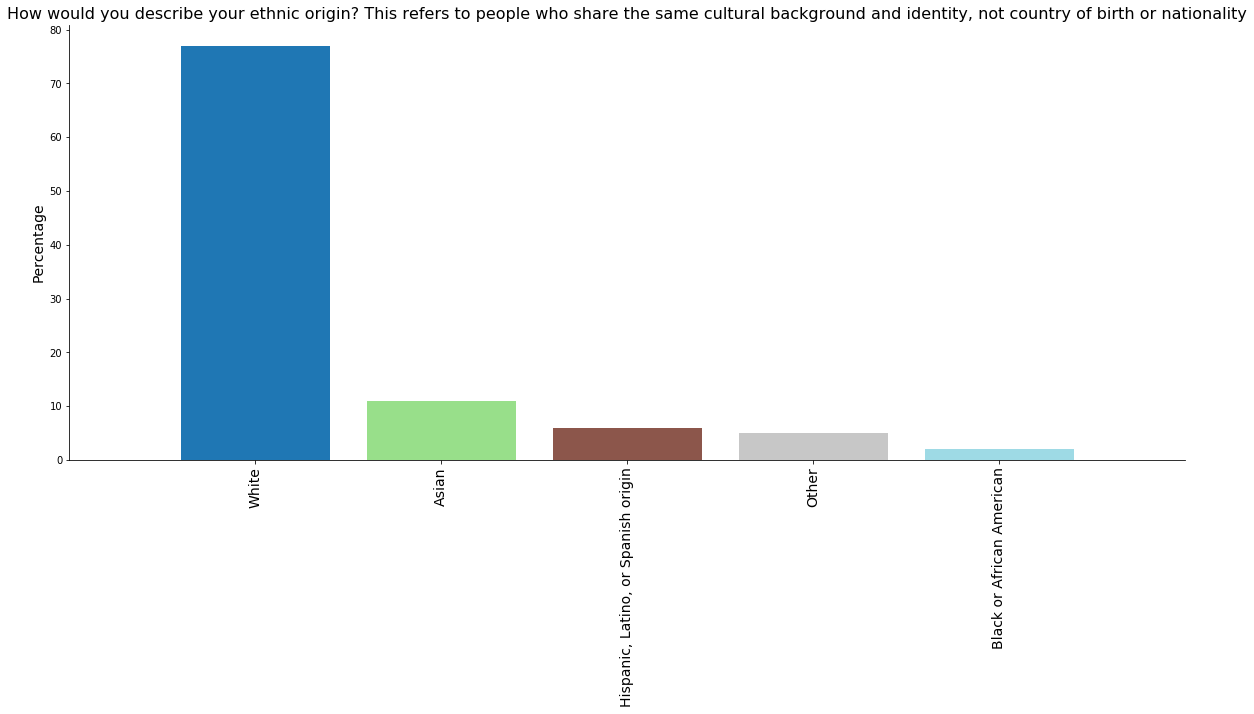

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Salary

We asked the participants to give us the range of salary they are paid. The most common salary in USA for the participants is *from \$70,000 to \$89,999* (28%) and *from \$90,000 to \$109,999* (29%). On the extremes, 4 RSEs earn less than \$30,000 while 10 earn more than \$150,000

### Please select the range of your salary

In [23]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "one choice", "./../survey_creation/2017/us/listAnswers/salary.csv", "True", "./2017/us/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select the range of your salary                   
Less than \$30,000                          4         3.0
From \$30,000 to \$49,999                  10         7.0
From \$50,000 to \$69,999                  25        18.0
From \$70,000 to \$89,999                  28        20.0
From \$90,000 to \$109,999                 29        21.0
From \$110,000 to \$129,999                16        11.0
From \$130,000 to \$149,999                 8         6.0
More than \$150,000                        10         7.0
Prefer not to say                          10         7.0
NaN                                        24         NaN

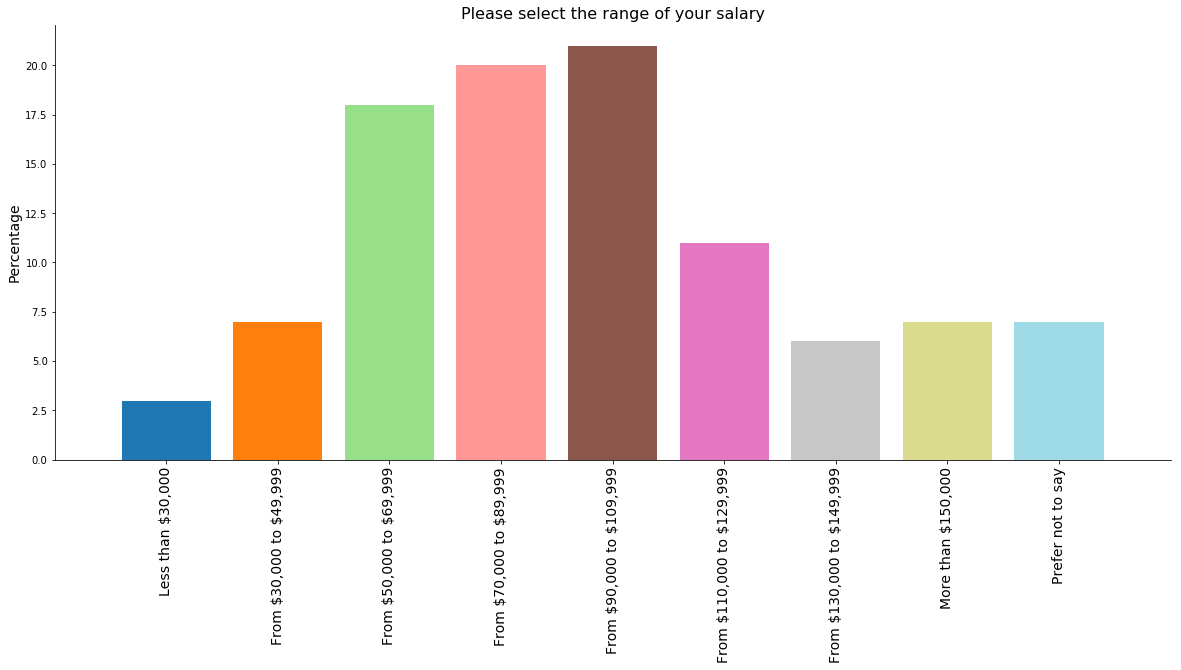

In [26]:
_ = get_plot(perc_to_count, "one choice")

## Disability

To ensure equality, it is important to gather information about disability. In this regard, 3% of the participants declare having a condition as defined by the Americans with Disabilities Act (ADA)

### Do you have a condition that is defined as a disability by the Americans with Disabilities Act (ADA)?

In [27]:
v_to_count, filename  = get_count(df, ['disa1. Do you have a condition that is defined as a disability by the Americans with Disabilities Act (ADA)?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you have a condition that is defined as a di...                            
 Do you have a condition that is defined as a d...            4         135   

                                                    NaN value  \
Do you have a condition that is defined as a di...              
 Do you have a condition that is defined as a d...         25   

                                                    Yes [Percentage]  \
Do you have a condition that is defined as a di...                     
 Do you have a condition that is defined as a d...               3.0   

                                                    No [Percentage]  
Do you have a condition that is defined as a di...                   
 Do you have a condition that is defined as a d...             97.0

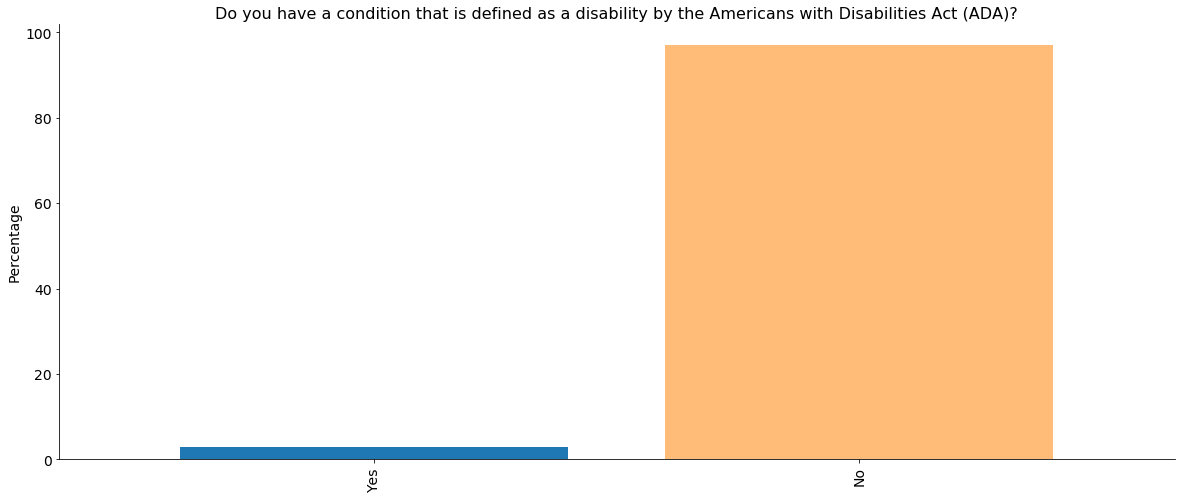

In [30]:
_ = get_plot(perc_to_count, "y/n/na")

## Qualifications

A majority of RSEs hold a *doctorate* (60%) followed by *master degree* (25%) and *undergraduate degree* (12%). The rest of the degree are marginal. This show a necessity for RSEs to be embedded in a research process before becoming software developer in research. 

For the type of background, some cleansing were done to transform specific fields into more generic ones as used [here](https://www.thecompleteuniversityguide.co.uk/courses). Most RSEs come from a background in *Computer Science* (25%) followed by *Biological Sciences* and *Physics and Astronomy* (both represent 15%).
There is a significant reduction in proportion for the next backgrounds but overall the origin is quite diverse with a total of 23 different fields (including the field *Other*).

When we asked the RSEs if they hold any professional qualifications, 23 of them answered to it but when we take a closer looks to the results, it appears that only a small number get some certificates in machine learning, bioinformatic or in GIS. 

### What is the highest degree/qualification you have obtained?

In [31]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest degree/qualification you have obtained?'], "one choice", "./../survey_creation/2017/us/listAnswers/education.csv", "False", "./2017/us/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What is the highest degree/qualification you ha...                   
Doctorate                                              99        60.0
Master degree                                          41        25.0
Undergraduate degree                                   19        12.0
Associate degree                                        2         1.0
High school graduate or GED                             2         1.0
Other                                                   1         1.0

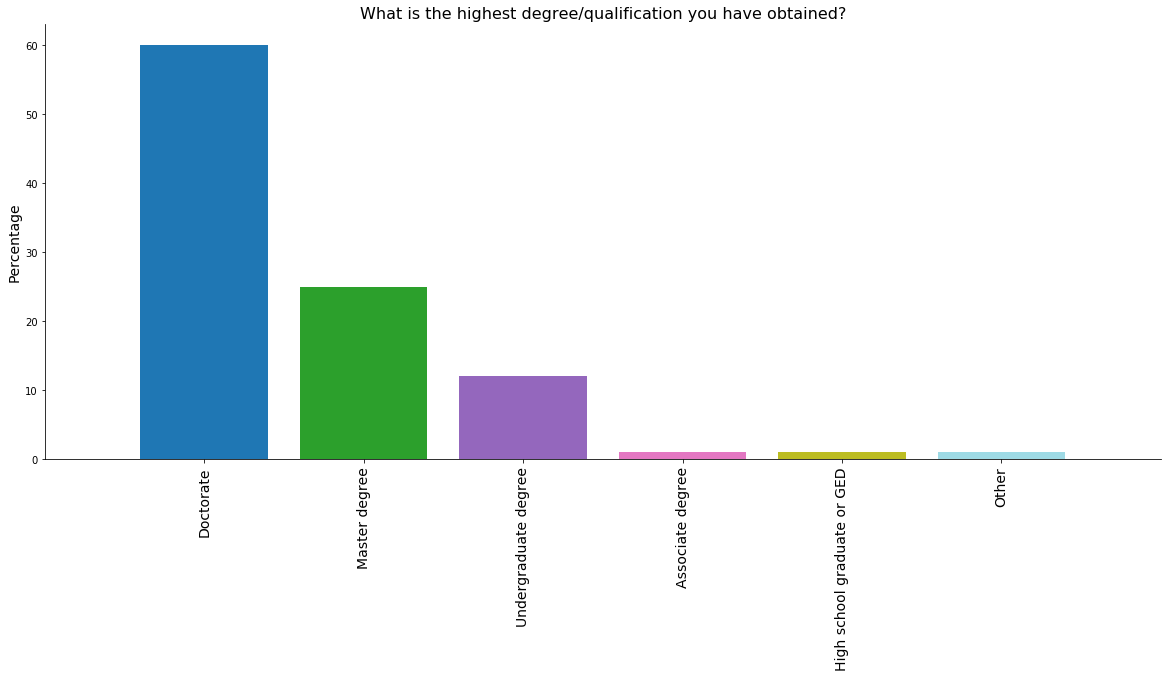

In [34]:
_ = get_plot(perc_to_count, "one choice")

### In which subject is your highest academic degree/qualification?

In [35]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic degree/qualification?'], "one choice", "./../survey_creation/2017/us/listAnswers/academic_field.csv", "False", "./2017/us/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which subject is your highest academic degre...                   
Computer Science                                       41        25.0
Biological Sciences                                    24        15.0
Physics and Astronomy                                  24        15.0
Other                                                  15         9.0
Chemistry                                              14         9.0
Mathematics                                             9         5.0
Mechanical Engineering                                  7         4.0
Electrical & Electronic Engineering                     5         3.0
Geology                                                 4         2.0
Chemical Engineering                                    3         2.0
Anthropology                                            2         1.0
Civil Engineering                                       2         1.0
Aeronautical & Manufacturing Engineering                2         1.0
Agriculture & Forestry                                  2         1.0
Psychology                                              2         1.0
Music                                                   1         1.0
Geography & Environmental Sciences                      1         1.0
Linguistics                                             1         1.0
Politics                                                1         1.0
Medicine                                                1         1.0
Russian & East European Languages                       1         1.0
General Engineering                                     1         1.0
Business & Management Studies                           1         1.0

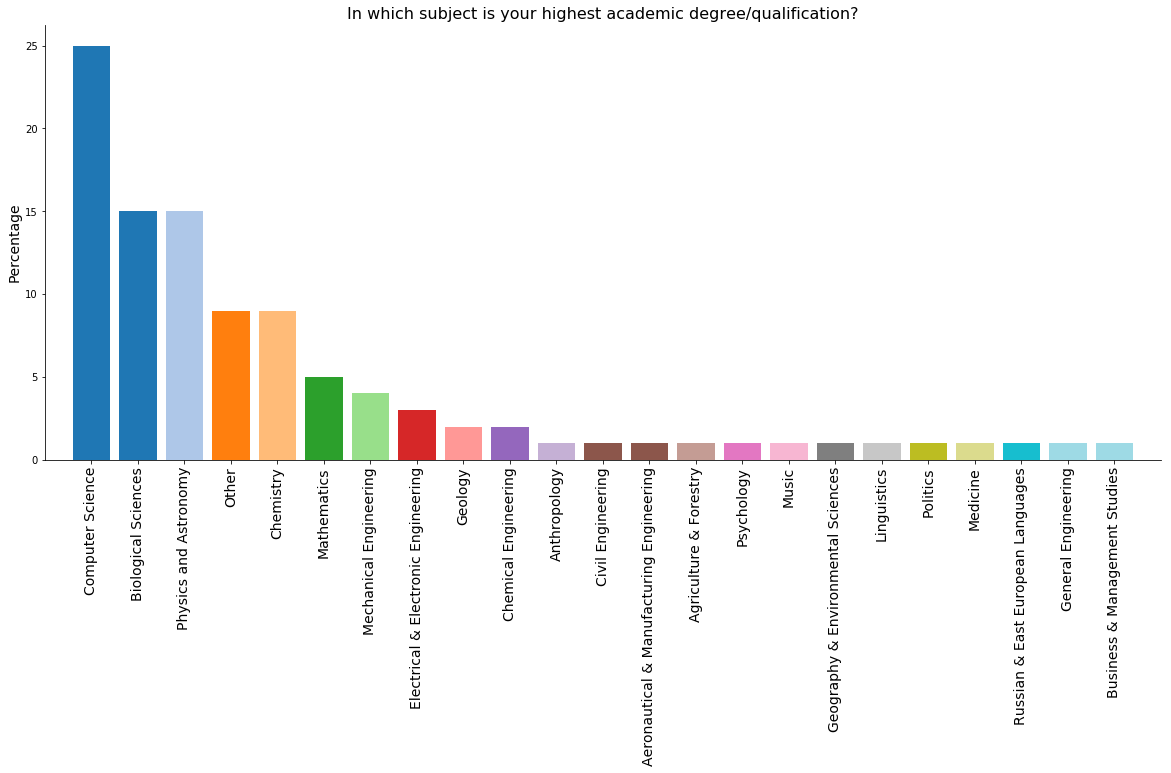

In [38]:
_ = get_plot(perc_to_count, "one choice")

## Professional qualifications

### Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)

In [39]:
data = df['edu4. Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)'].dropna()
data = [i.replace(',', ';').strip() for i in data if len(i.strip()) > 2 and i.strip().lower() not in ['m.s.', 'dr.', 'msc', 'm.a.', 'bsc', 'b.sc.', 'nein', 'diplom', 'none', 'ba. sc.', 'ma. sc.', 'b sc']]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]

Number of participants that have a professional qualifications: 22


In [40]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

M.S. 2
Dinosaur 1
Master Of Sceince In Computer Science 1
Certificates In Bioinformatics 1
Certificates In Machine Learning 1
M.L.I.S. 1
Chemistry 1
Certificate In Dispute Resolution 1
The Highest Academic Degree Is Geophysics 1
B.S In Computer Science 1
Linux Professional Institute 1
Bachelors Degree In Computational Mathematics In Addition To My Degree In Computer Science 1
Ba Physics 1
Phd Minor In Life Sciences Communication 1
B. Tech 1
Ms In Computer Science 1
Bachelors In Computer Engineering 1
Diploma In Computer Engineering 1
Journeyman Machinist 1
Rhsca 1
Psychology Bs 1
Certificate 1
Master 1
Ms Biology 1
Ba Mathematics 1


In [41]:
 wc = wordcloud(df, ['edu4. Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)'])

(-0.5, 1499.5, 799.5, -0.5)

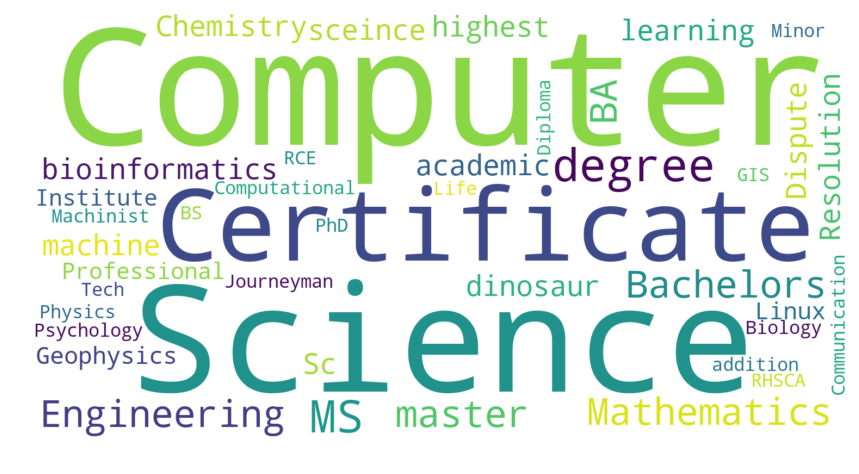

In [42]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 2: Questions about coding

In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (96%) write code. They are, in vast majority, writing code for other people. Only 7% of them write code for themselves. A high proportion even writes code for 5 or more people (26%).

However, despite the majority of them writing code, only 61% consider themselves as professional software developer. This is a low number when we consider the average time of developing software (14 years) and that they are mainly developing software for others.

Unsurprisingly, RSEs spend the majority of their time coding. The second activity that seems to take their time is "research". So it would appear that their job title accurately describes their work. "Teaching" is the aspect of work with the least call on RSEs time: 45% of RSEs reported that they spent no time in teaching at all.

### Do you write code as part of your job?

In [43]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [44]:
perc_to_count = get_percentage(v_to_count, filename)

In [45]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you write code as part of your job?                             
 Do you write code as part of your job?          163           1   

                                         Yes [Percentage]  No [Percentage]  
Do you write code as part of your job?                                      
 Do you write code as part of your job?              99.0              1.0

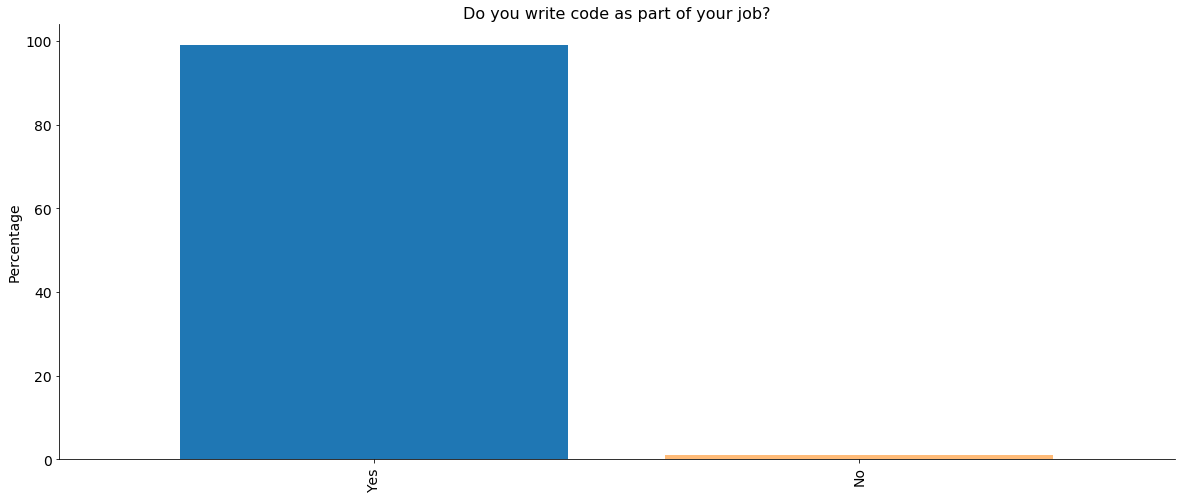

In [46]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code that you write?

In [47]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../survey_creation/2017/us/listAnswers/likert_usage_5.csv", "True", "./2017/us/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Who uses the code that you write?                   
0 - Mostly me                          7         4.0
1                                     14         9.0
2                                     20        12.0
3                                     46        28.0
4                                     35        21.0
5 - Mostly other people               42        26.0

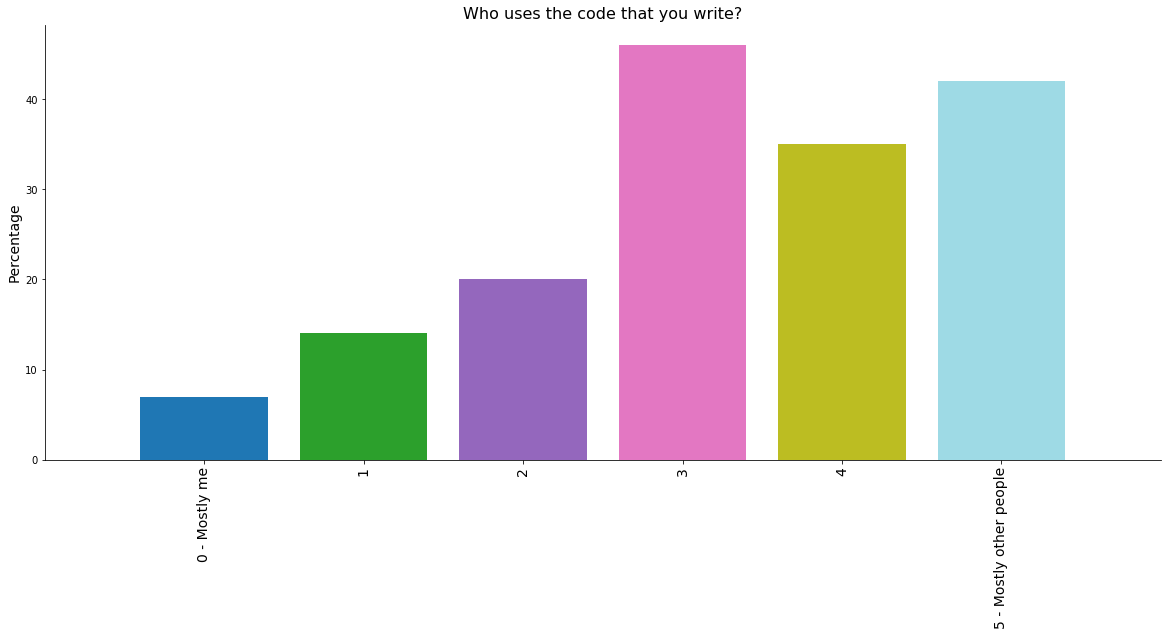

In [50]:
_ = get_plot(v_to_count, "one choice", dropna=False)

### Do you consider yourself a professional software developer?

In [51]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [52]:
perc_to_count = get_percentage(v_to_count, filename)

In [53]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you consider yourself a professional softwar...                            
 Do you consider yourself a professional softwa...           99          62   

                                                    NaN value  \
Do you consider yourself a professional softwar...              
 Do you consider yourself a professional softwa...          3   

                                                    Yes [Percentage]  \
Do you consider yourself a professional softwar...                     
 Do you consider yourself a professional softwa...              61.0   

                                                    No [Percentage]  
Do you consider yourself a professional softwar...                   
 Do you consider yourself a professional softwa...             39.0

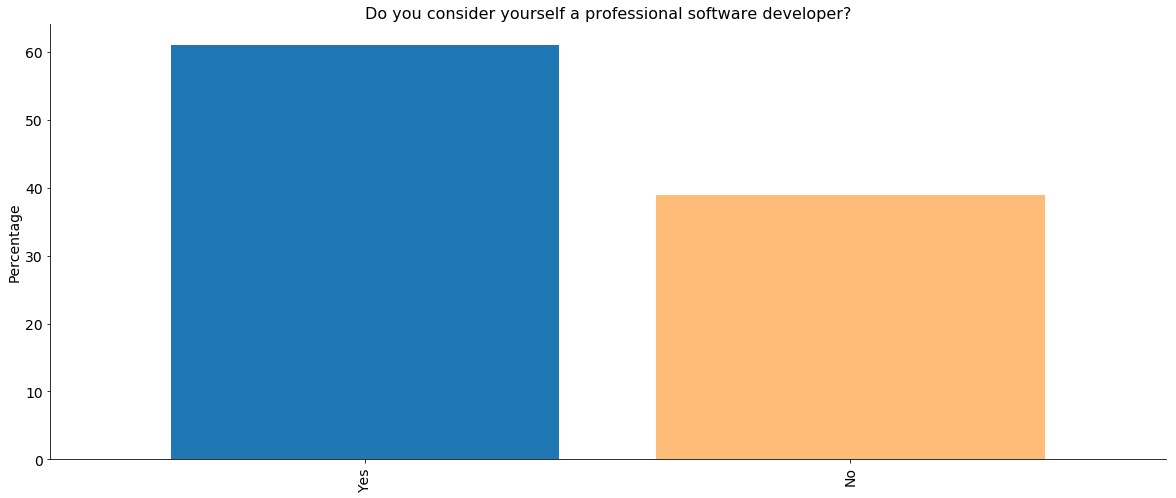

In [54]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of Software development experience do you have?

In [55]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of Software development experience do you have?'], "freenumeric", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

       soft1can. How many years of Software development experience do you have?
count                                         158.000000                       
mean                                           14.129747                       
std                                            10.252106                       
min                                             0.000000                       
25%                                             5.000000                       
50%                                            12.000000                       
75%                                            20.000000                       
max                                            50.000000                       


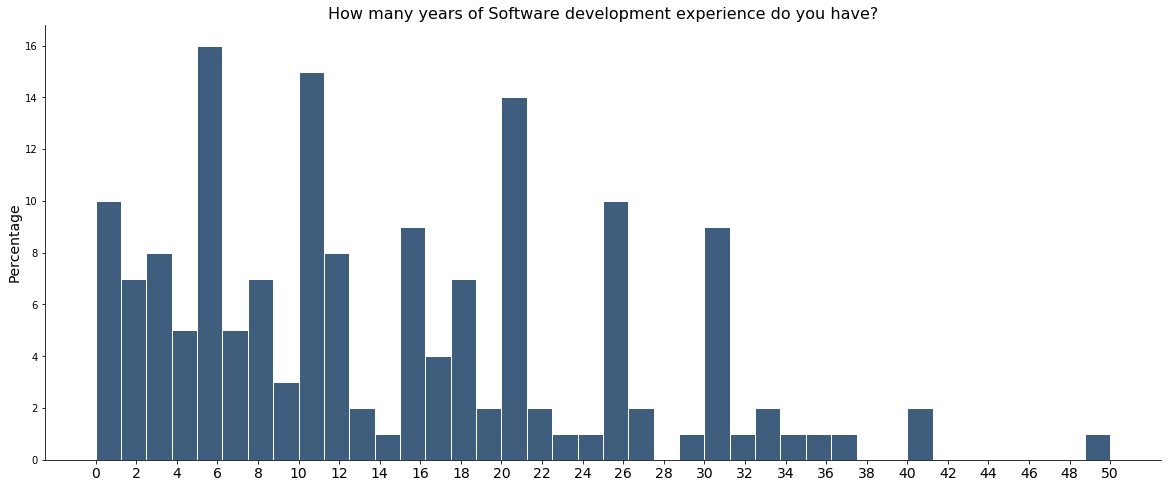

In [56]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.); In an average month, how much time do you spend on Research; In an average month, how much time do you spend on Management; In an average month, how much time do you spend on Teaching; In an average month, how much time do you spend on Other activities

In [57]:
v_to_count, filename  = get_count(df, ['likert0[time1can]. [In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)]', 'likert0[time2can]. [In an average month, how much time do you spend on Research]', 'likert0[time3can]. [In an average month, how much time do you spend on Management]', 'likert0[time4can]. [In an average month, how much time do you spend on Teaching]', 'likert0[time5can]. [In an average month, how much time do you spend on Other activities]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_time_10.csv", "False", "./2017/us/output/")

In [58]:
display(v_to_count) 

In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)  \
Spending time                                                                                                                                                                       
1 (Never)                                                    NaN                                                                                                                    
2                                                           10.0                                                                                                                    
3                                                           25.0                                                                                                                    
4                                                           19.0                                                                                                                    
5                                                           21.0                                                                                                                    
6                                                           19.0                                                                                                                    
7                                                           23.0                                                                                                                    
8                                                           31.0                                                                                                                    
9                                                           12.0                                                                                                                    
10 (Always)                                                  3.0                                                                                                                    

               In an average month, how much time do you spend on Research  \
Spending time                                                                
1 (Never)                                                     11             
2                                                             39             
3                                                             40             
4                                                             25             
5                                                             13             
6                                                              7             
7                                                              9             
8                                                              8             
9                                                              8             
10 (Always)                                                    3             

               In an average month, how much time do you spend on Management  \
Spending time                                                                  
1 (Never)                                                     36               
2                                                             57               
3                                                             25               
4                                                             19               
5                                                             11               
6                                                              3               
7                                                              3               
8                                                              4               
9                                                              2               
10 (Always)              

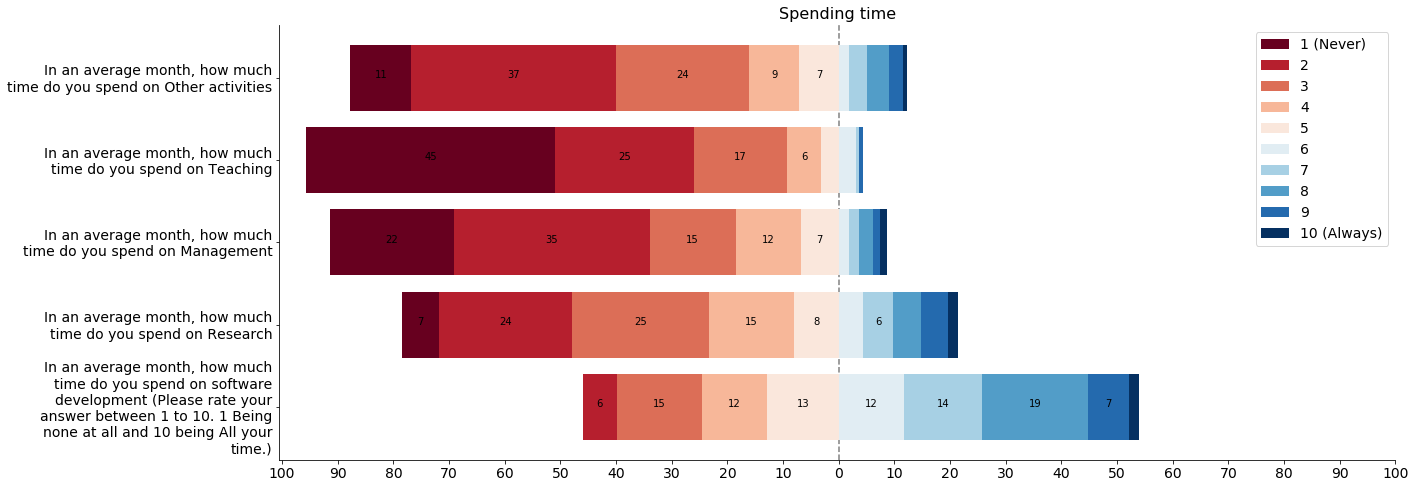

In [59]:
_ = get_plot(v_to_count, "likert")

# Section 3. Questions about employment

75% of RSEs work within a university and 11% in National laboratory and it seems that University of Illinois and Princeton University have the highest concentration of the participants (7% each) but overall the participants seems widely spread in a number of different Universities. 

A list of different organisations, when RSEs were not working for any university is also given below, as well as a job title. About the job title, 44 participants mention that their official job title differs from the one they are actually using.

At the question about the field where they work, the participants mainly answered *Computer Science*, followed by *Physics and Astronomy* and *Biological Sciences* (both 14%). These is the three main disciplines found in the question about education.

### What type of organization do you work for?

In [60]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organization do you work for?'], "one choice", "./../survey_creation/2017/us/listAnswers/type_organisation.csv", "False", "./2017/us/output/")

In [61]:
perc_to_count = get_percentage(v_to_count, filename)

In [62]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What type of organization do you work for?                           
University (offering both undergraduate and gra...    121        75.0
National laboratory                                    18        11.0
Private company                                         8         5.0
Other non-profit                                        5         3.0
College, including community colleges (offering...      5         3.0
Other government agency                                 3         2.0
Other                                                   2         1.0
NaN                                                     2         NaN

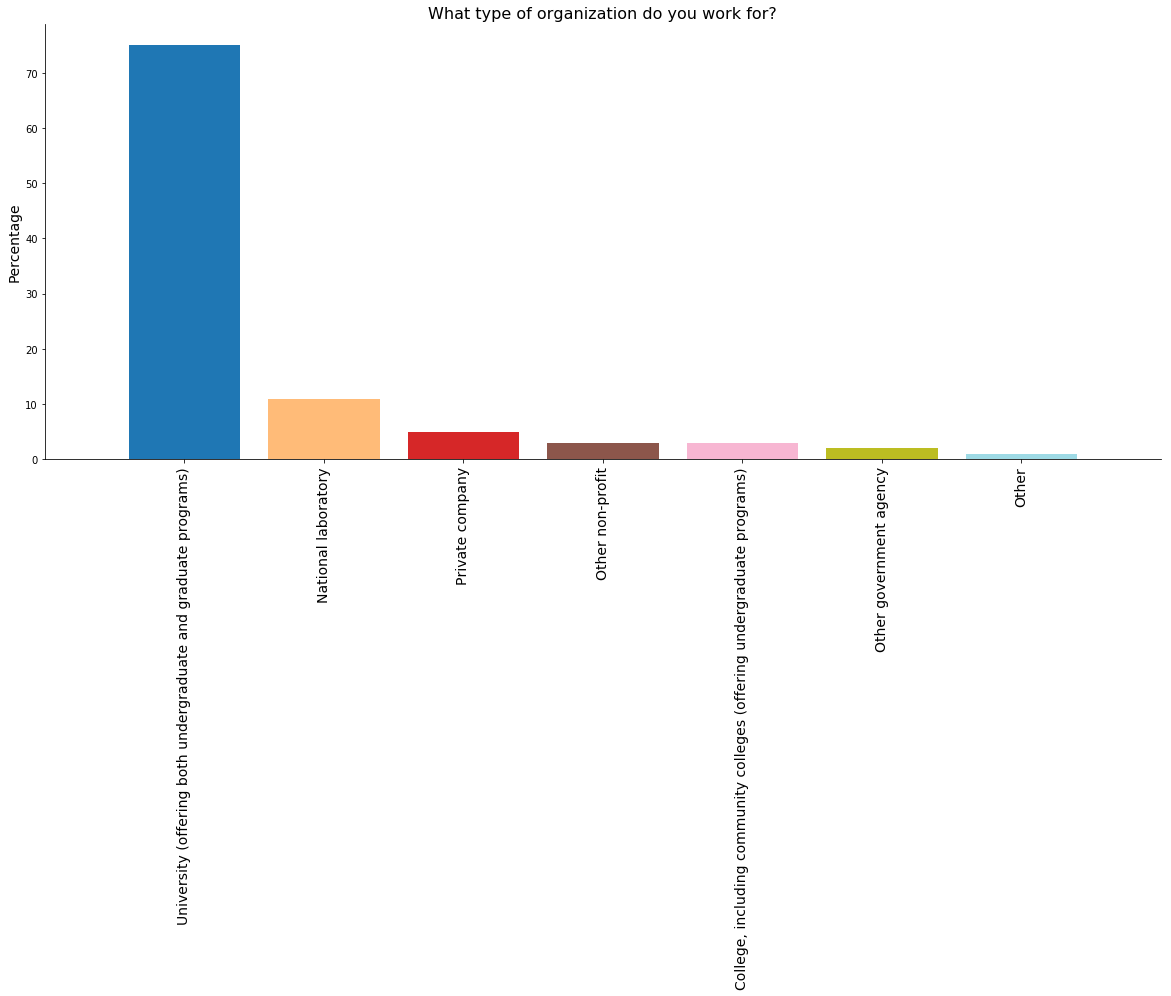

In [63]:
_ = get_plot(perc_to_count, "one choice")

### Which University?

In [64]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which University?'], "one choice", "./../survey_creation/2017/us/listAnswers/universities.csv", "False", "./2017/us/output/")

In [65]:
perc_to_count = get_percentage(v_to_count, filename)

In [66]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which University?                                                    
University of Ilinois at Urbana-Champaign               9         7.0
Princeton University                                    8         7.0
Ohio State University, Columbus                         6         5.0
Purdue University                                       5         4.0
University of Notre Dame                                5         4.0
University of Michigan-Ann Arbor                        4         3.0
Stanford University                                     4         3.0
Johns Hopkins University                                4         3.0
Virginia Polytechnic Institute and State Univer...      4         3.0
University of California, Berkeley                      4         3.0
University of Wisconsin-Madison                         4         3.0
Other                                                   3         2.0
Massachusetts Institute of Technology                   3         2.0
University of Colorado at Boulder                       3         2.0
University of Washington                                3         2.0
University of California, Davis                         3         2.0
Pennsylvania State University                           2         2.0
University of Alabama at Birmingham                     2         2.0
University of Missouri-Columbia                         2         2.0
California Institute of Technology                      2         2.0
University of California, Santa Barbara                 2         2.0
Colorado State University                               2         2.0
University of Chicago                                   2         2.0
Harvard University                                      2         2.0
New York University                                     2         2.0
University of Florida                                   2         2.0
Cornell University                                      2         2.0
Columbia University                                     1         1.0
University of California, San Diego                     1         1.0
University of Colorado at Colorado Springs              1         1.0
University of Nebraska, Lincoln                         1         1.0
University of Texas at Tyler                            1         1.0
College of William and Mary                             1         1.0
Florida Agricultural and Mechanical University          1         1.0
Georgia Institute of Technology                         1         1.0
University of Texas at Austin                           1         1.0
University of Virginia, Charlottesville                 1         1.0
Vanderbilt University                                   1         1.0
California Polytechnic State University, San Lu...      1         1.0
State University of New York at Buffalo                 1         1.0
Northwestern University                                 1         1.0
University of Kentucky                                  1         1.0
Temple University                                       1         1.0
University of Houston                                   1         1.0
University of Arizona                                   1         1.0
University of Utah                                      1         1.0
Rice University                                         1         1.0
Yale University                                         1         1.0
University of California, San Francisco                 1         1.0
University of Oregon                                    1         1.0
Case Western Reserve University                         1         1.0
University of Southern California                       1         1.0
University of California, Riverside                     1         1.0
Washington State University                             1         1.0
State University of New York at Stony Brook             1         1.0
NaN                                                    42     

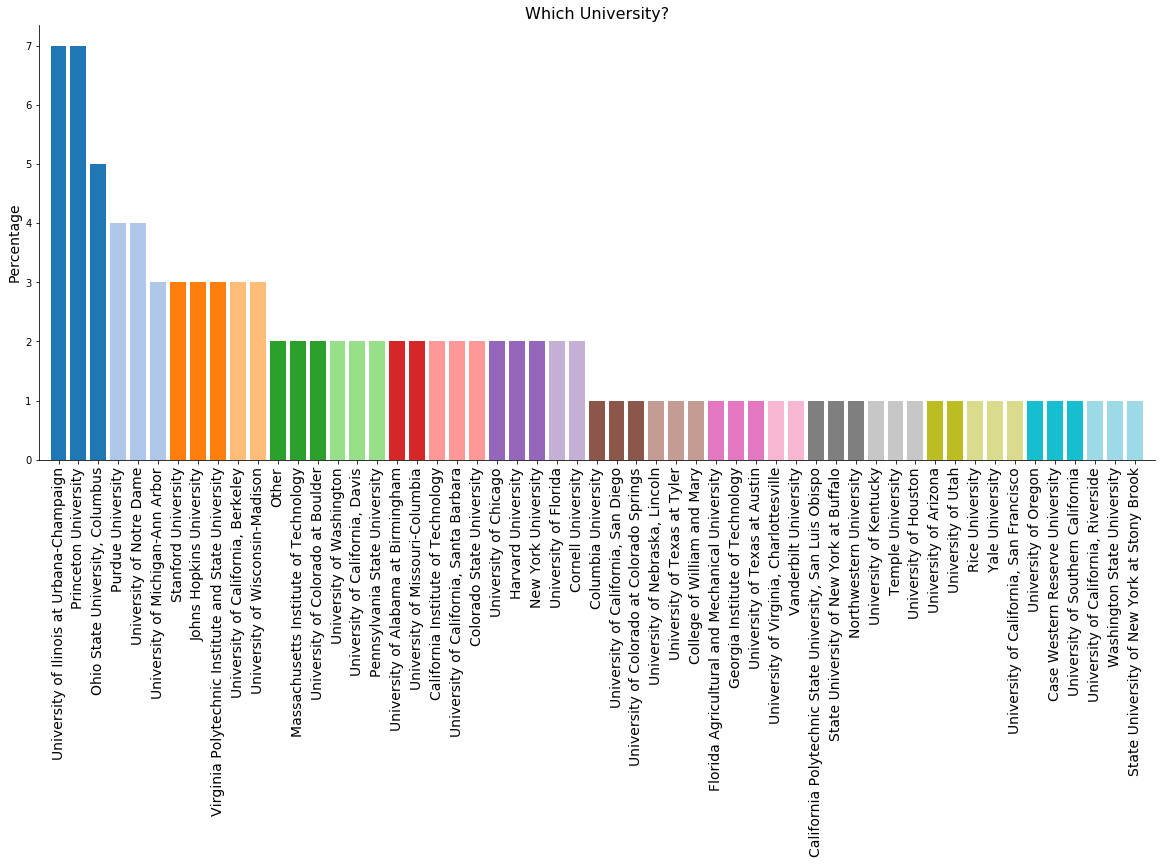

In [67]:
_ = get_plot(perc_to_count, "one choice")

### Which organization do you work for?

In [68]:
 wc = wordcloud(df, ['currentEmp4. Which organization do you work for?'])

(-0.5, 1499.5, 799.5, -0.5)

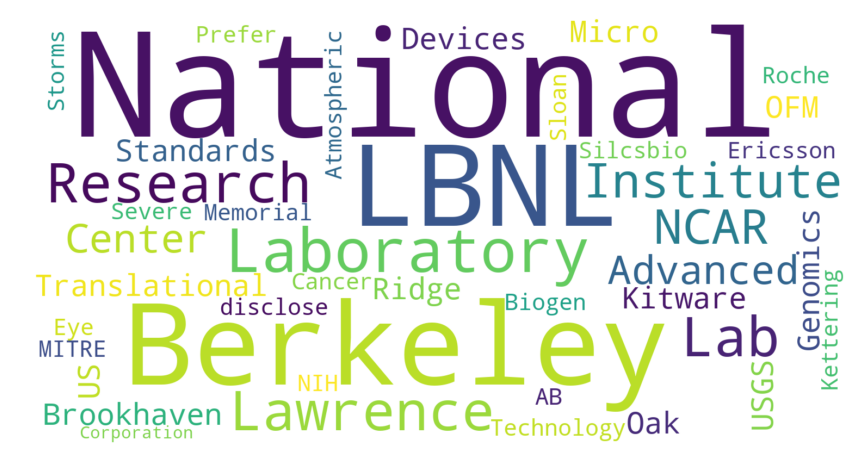

In [69]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What is your official job title?

In [70]:
data = df['currentEmp5. What is your official job title?'].dropna()
data = [z.replace('/', ';').replace(',', ';').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]
print('There are {} propositions'.format(len(data)))

There are 166 propositions


In [71]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Research Scientist 10
Research Programmer 7
Software Engineer 4
Scientific Software Engineer 3
Assistant Professor 3
Professor 3
Graduate Research Assistant 3
Research Associate 3
Programmer 3
Scientific Programmer 3
Postdoc 2
Senior Research Programmer 2
Senior Software Engineer 2
Project Scientist 2
Research Assistant Professor 2
Research Software Engineer 2
Computational Scientist 2
Engineer 2
Research Engineer 2
Graduate Student Researcher 2
Director 2
Postdoctoral Fellow 2
Postdoctoral Researcher 2
Research Computing Facilitator 2
Graduate Assistant 2
Staff Scientist 2
Research Data Specialist 1
Data Science 1
Member Of The Technical Staff 1
Senior Research Specialist 1
Director Of Informatics Research And Development 1
Bioinformatician 1
Research Technical Associate 1
Associate Computational Scientist 1
Lead Research Software Engineer 1
Research Associate Professor 1
Principal Data Scientist 1
Software Engineer Iv 1
Research Scientist Ii 1
Application Programmer 1
Analyst Senior 

In [72]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title?'])

(-0.5, 1499.5, 799.5, -0.5)

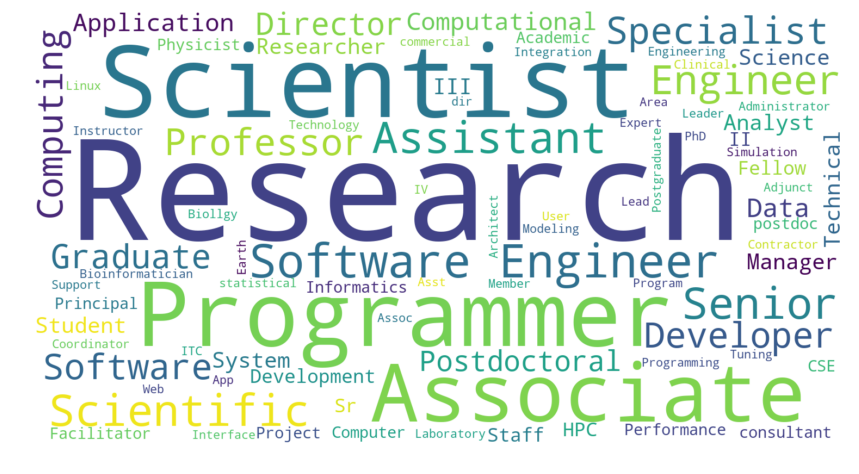

In [73]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known by a different job title? If so, please enter the job title you use

In [74]:
data = df['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'].dropna()
data = [z.replace('/', ';').replace(',', ';').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]
print('There are {} propositions'.format(len(data)))

There are 44 propositions


In [75]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Computational Scientist 2
Research Assistant 2
Software Engineer 2
Vanessasaurus 1
Research Software Engineer 2 1
Research Computing Consultant 1
Systems Engineer 1
Senior Research Software Engineer 1
Director Of Research Computing 1
Sr Computational Science Researcher 1
Service Manager 1
Associate Director For Information Technology 1
Principal Researcher 1
Associate Research Professor 1
Linux Administrator 1
Programmer 1
Lecuturer 1
Computational Biologist 1
Associate Director 1
Director Of Operations 1
Curator Or Researcher 1
Software Developer 1
Data Analyst 1
User Support 1
Software Systems Integration Scientist 1
Lead Developer 1
Senior Research Associate 1
Computational Research Consultant 1
Research Assistant Professor 1
Director Of Research Computing Support Services 1
Director Of Synthetic Biology Informatics 1
Engineer 1
Data Manager 1
Research Associate 1
Research Fellow 1
Research Applications Developer 1
Research Scientist 1
Software Scientist 1
High Performance Computing

In [76]:
 wc = wordcloud(df, ['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

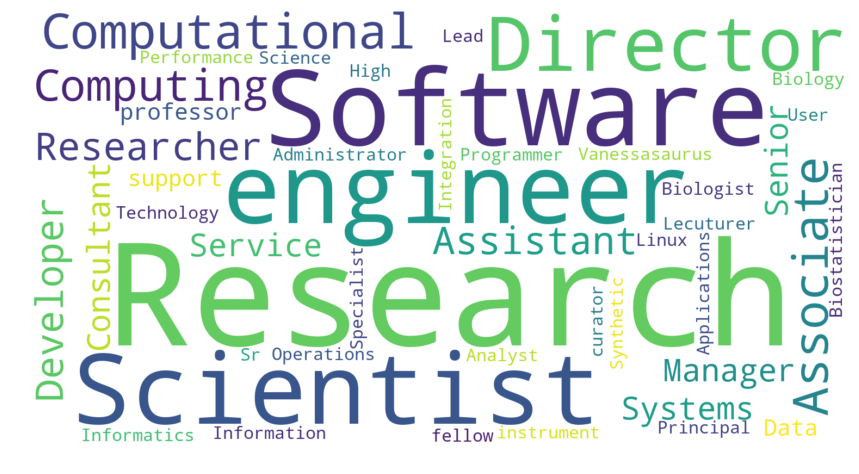

In [77]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In which disciplines do you work (select as many as apply)

In [78]:
v_to_count, filename  = get_count(df, ['currentEmp13[1]. In which disciplines do you work (select as many as apply) [Accounting & Finance]', 'currentEmp13[2]. In which disciplines do you work (select as many as apply) [Aeronautical & Manufacturing Engineering]', 'currentEmp13[3]. In which disciplines do you work (select as many as apply) [Agriculture & Forestry]', 'currentEmp13[4]. In which disciplines do you work (select as many as apply) [American Studies]', 'currentEmp13[5]. In which disciplines do you work (select as many as apply) [Anatomy & Physiology]', 'currentEmp13[6]. In which disciplines do you work (select as many as apply) [Anthropology]', 'currentEmp13[7]. In which disciplines do you work (select as many as apply) [Architecture]', 'currentEmp13[8]. In which disciplines do you work (select as many as apply) [Art & Design]', 'currentEmp13[9]. In which disciplines do you work (select as many as apply) [Biological Sciences]', 'currentEmp13[10]. In which disciplines do you work (select as many as apply) [Business & Management Studies]', 'currentEmp13[11]. In which disciplines do you work (select as many as apply) [Chemical Engineering]', 'currentEmp13[12]. In which disciplines do you work (select as many as apply) [Chemistry]', 'currentEmp13[13]. In which disciplines do you work (select as many as apply) [Civil Engineering]', 'currentEmp13[14]. In which disciplines do you work (select as many as apply) [Classics & Ancient History]', 'currentEmp13[15]. In which disciplines do you work (select as many as apply) [Communication & Media Studies]', 'currentEmp13[16]. In which disciplines do you work (select as many as apply) [Complementary Medicine]', 'currentEmp13[17]. In which disciplines do you work (select as many as apply) [Computer Science]', 'currentEmp13[18]. In which disciplines do you work (select as many as apply) [Counselling]', 'currentEmp13[19]. In which disciplines do you work (select as many as apply) [Criminology]', 'currentEmp13[20]. In which disciplines do you work (select as many as apply) [Dentistry]', 'currentEmp13[21]. In which disciplines do you work (select as many as apply) [East & South Asian Studies]', 'currentEmp13[22]. In which disciplines do you work (select as many as apply) [Economics]', 'currentEmp13[23]. In which disciplines do you work (select as many as apply) [Education]', 'currentEmp13[24]. In which disciplines do you work (select as many as apply) [Electrical & Electronic Engineering]', 'currentEmp13[25]. In which disciplines do you work (select as many as apply) [English]', 'currentEmp13[26]. In which disciplines do you work (select as many as apply) [Fashion]', 'currentEmp13[27]. In which disciplines do you work (select as many as apply) [Food Science]', 'currentEmp13[28]. In which disciplines do you work (select as many as apply) [French]', 'currentEmp13[29]. In which disciplines do you work (select as many as apply) [Geography & Environmental Sciences]', 'currentEmp13[30]. In which disciplines do you work (select as many as apply) [Geology]', 'currentEmp13[31]. In which disciplines do you work (select as many as apply) [General Engineering]', 'currentEmp13[32]. In which disciplines do you work (select as many as apply) [German]', 'currentEmp13[33]. In which disciplines do you work (select as many as apply) [History]', 'currentEmp13[34]. In which disciplines do you work (select as many as apply) [History of Art, Architecture & Design,]', 'currentEmp13[35]. In which disciplines do you work (select as many as apply) [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[36]. In which disciplines do you work (select as many as apply) [Iberian Languages/Hispanic Studies]', 'currentEmp13[37]. In which disciplines do you work (select as many as apply) [Land & Property Management]', 'currentEmp13[38]. In which disciplines do you work (select as many as apply) [Law]', 'currentEmp13[39]. In which disciplines do you work (select as many as apply) [Librarianship & Information Management]', 'currentEmp13[40]. In which disciplines do you work (select as many as apply) [Linguistics]', 'currentEmp13[41]. In which disciplines do you work (select as many as apply) [Marketing]', 'currentEmp13[42]. In which disciplines do you work (select as many as apply) [Materials Technology]', 'currentEmp13[43]. In which disciplines do you work (select as many as apply) [Mathematics]', 'currentEmp13[44]. In which disciplines do you work (select as many as apply) [Mechanical Engineering]', 'currentEmp13[45]. In which disciplines do you work (select as many as apply) [Medicine]', 'currentEmp13[46]. In which disciplines do you work (select as many as apply) [Middle Eastern and African Studies]', 'currentEmp13[47]. In which disciplines do you work (select as many as apply) [Music]', 'currentEmp13[48]. In which disciplines do you work (select as many as apply) [Nursing]', 'currentEmp13[49]. In which disciplines do you work (select as many as apply) [Ophthalmics]', 'currentEmp13[50]. In which disciplines do you work (select as many as apply) [Pharmacology & Pharmacy]', 'currentEmp13[51]. In which disciplines do you work (select as many as apply) [Philosophy]', 'currentEmp13[52]. In which disciplines do you work (select as many as apply) [Physics and Astronomy]', 'currentEmp13[53]. In which disciplines do you work (select as many as apply) [Physiotherapy]', 'currentEmp13[54]. In which disciplines do you work (select as many as apply) [Politics]', 'currentEmp13[55]. In which disciplines do you work (select as many as apply) [Psychology]', 'currentEmp13[56]. In which disciplines do you work (select as many as apply) [Robotics]', 'currentEmp13[57]. In which disciplines do you work (select as many as apply) [Russian & East European Languages]', 'currentEmp13[58]. In which disciplines do you work (select as many as apply) [Social Policy]', 'currentEmp13[59]. In which disciplines do you work (select as many as apply) [Social Work]', 'currentEmp13[60]. In which disciplines do you work (select as many as apply) [Sociology]', 'currentEmp13[61]. In which disciplines do you work (select as many as apply) [Sports Science]', 'currentEmp13[62]. In which disciplines do you work (select as many as apply) [Theology & Religious Studies]', 'currentEmp13[63]. In which disciplines do you work (select as many as apply) [Town & Country Planning and Landscape Design]', 'currentEmp13[64]. In which disciplines do you work (select as many as apply) [Veterinary Medicine]', 'currentEmp13[65]. In which disciplines do you work (select as many as apply) [Youth Work]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/academic_field.csv", "False", "./2017/us/output/")

In [79]:
# Removing all the categories that have a 0 as count
v_to_count = v_to_count[v_to_count['Count'] >0]

In [80]:
perc_to_count = get_percentage(v_to_count, filename)

In [81]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which disciplines do you work (select as man...                   
Computer Science                                       93        21.0
Biological Sciences                                    53        12.0
Physics and Astronomy                                  40         9.0
Mathematics                                            23         5.0
Geology                                                23         5.0
Chemistry                                              23         5.0
Mechanical Engineering                                 20         4.0
Geography & Environmental Sciences                     20         4.0
Medicine                                               13         3.0
Electrical & Electronic Engineering                    13         3.0
Materials Technology                                   13         3.0
Education                                              10         2.0
Civil Engineering                                       9         2.0
Chemical Engineering                                    9         2.0
General Engineering                                     9         2.0
Robotics                                                7         2.0
Aeronautical & Manufacturing Engineering                7         2.0
Psychology                                              6         1.0
Librarianship & Information Management                  6         1.0
Sociology                                               6         1.0
Economics                                               6         1.0
Agriculture & Forestry                                  5         1.0
Politics                                                4         1.0
Anthropology                                            3         1.0
Marketing                                               3         1.0
Linguistics                                             2         0.0
Nursing                                                 2         0.0
Pharmacology & Pharmacy                                 2         0.0
Business & Management Studies                           2         0.0
Anatomy & Physiology                                    2         0.0
Veterinary Medicine                                     2         0.0
Music                                                   1         0.0
Social Policy                                           1         0.0
Town & Country Planning and Landscape Design            1         0.0
Accounting & Finance                                    1         0.0
History                                                 1         0.0
Architecture                                            1         0.0
History of Art, Architecture & Design,                  1         0.0
Food Science                                            1         0.0
Art & Design                                            1         0.0
Communication & Media Studies                           1         0.0

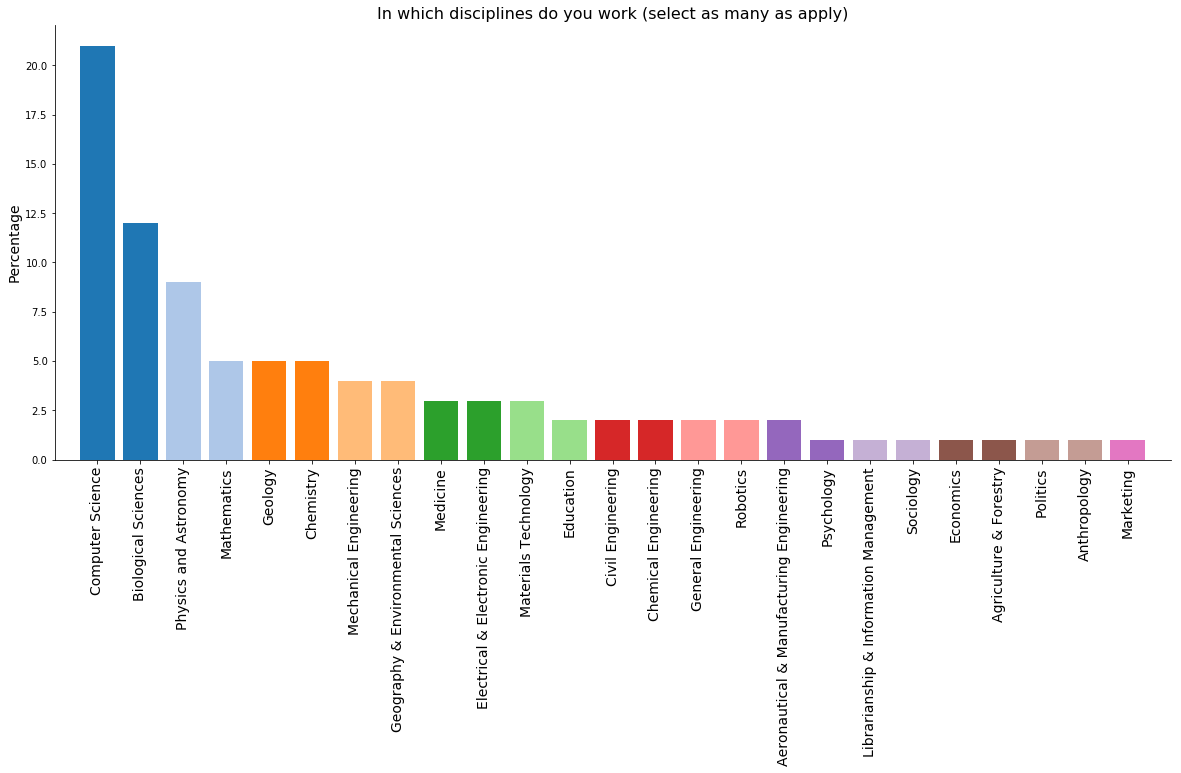

In [82]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 4. Questions about the type of contract

Type of contracts and funding are important to understand the situation of RSEs and if they have stable position in academia.
A vast majority of participants have a full time job (96%) and with a permanent position (42% as long as the funding are available and 40% with core funding). The average length of contract duration is more or less 6 years for the participants that does not have a permanent position.

For the source of funding, 90% of the participants know the origin of them. The majority of the project for which the participants work are funded through Grants (51%), followed by funding from institutions (29%). The rest of funding are marginal.
The second question about the funding was about the previous project. This helps to see if the source of funding changes over time for the participants. The answer is no, the sources of funding were exactly the same with only a slight variation in percentages, the grants account for 50% while the funding from institutions accounts for 29%. 

A question also asked about the funding about their effort as an RSE/equivalent. Here again the two tops sources of funding remains the same, 44% for Grants and 33% for institution. However, for their effort as RSE, 10% of the participants declared to volunteer their time.
It is important to note that these percentages are not mutually exclusives as the participants had the option to choose several sources of funding for each question.

### Do you work full time or part time

In [83]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time'], "one choice", "./../survey_creation/2017/us/listAnswers/type_hours.csv", "False", "./2017/us/output/")

In [84]:
perc_to_count = get_percentage(v_to_count, filename)

In [85]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you work full time or part time                   
Full Time                             155        96.0
Part-time                               6         4.0
NaN                                     3         NaN

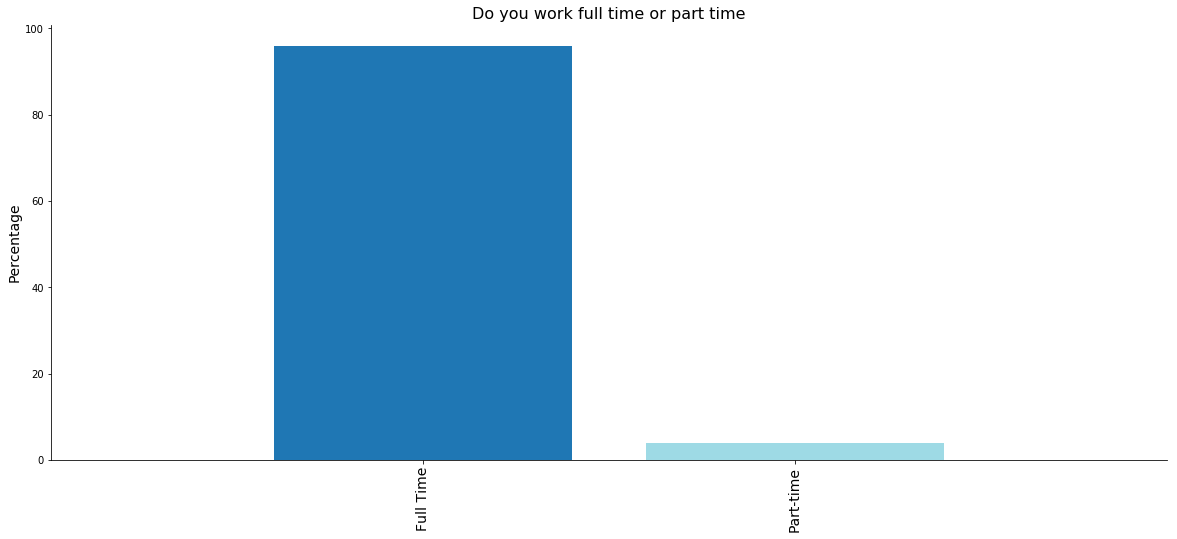

In [86]:
_ = get_plot(perc_to_count, "one choice")

### What type of employment do you have?

In [87]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of employment do you have?'], "one choice", "./../survey_creation/2017/us/listAnswers/type_contract.csv", "False", "./2017/us/output/")

In [88]:
perc_to_count = get_percentage(v_to_count, filename)

In [89]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What type of employment do you have?                                
Permanent -- as long as funding is available          67        42.0
Permanent -- funded by institutional core funding     64        40.0
Fixed term                                            24        15.0
Freelance                                              3         2.0
Other                                                  3         2.0
NaN                                                    3         NaN

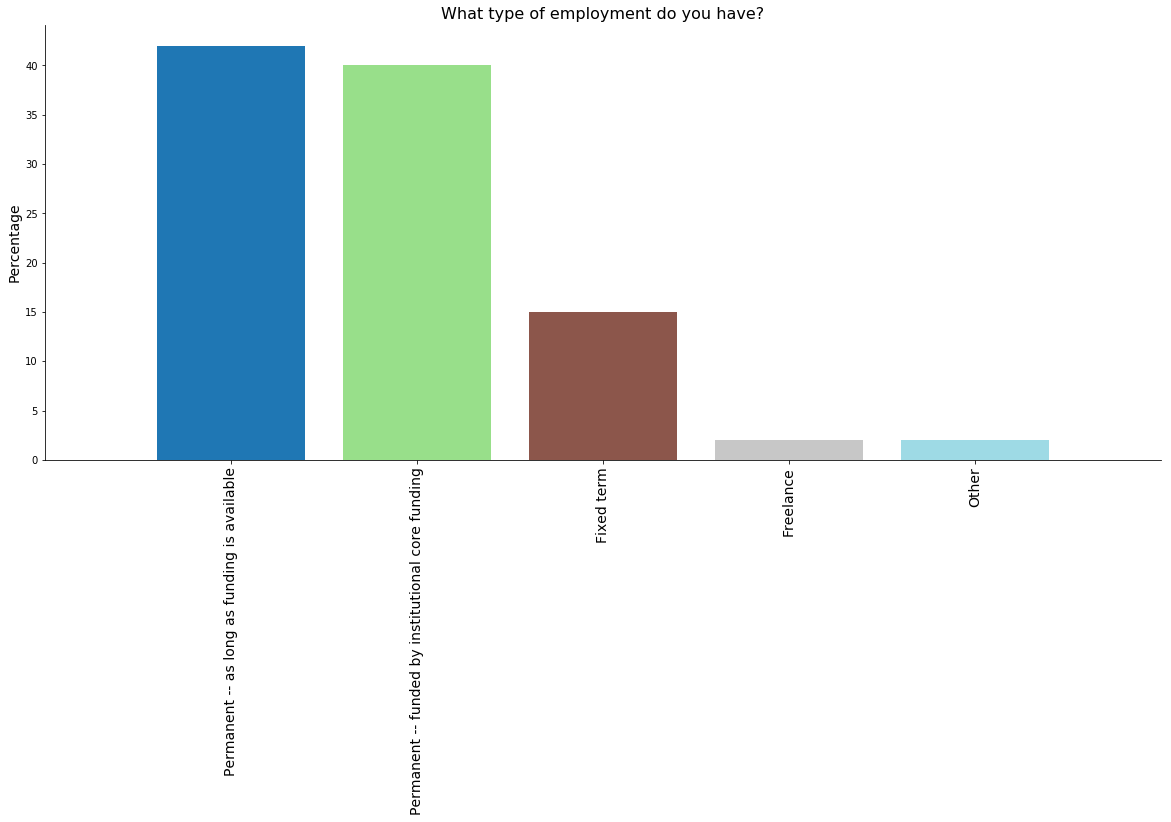

In [90]:
_ = get_plot(perc_to_count, "one choice")

### What is the total duration of your current employment (in years)?

In [91]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the total duration of your current employment (in years)?'], "freenumeric", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

       currentEmp11. What is the total duration of your current employment (in years)?
count                                         161.000000                              
mean                                            6.400621                              
std                                             6.546702                              
min                                             0.000000                              
25%                                             2.000000                              
50%                                             4.000000                              
75%                                             7.000000                              
max                                            37.000000                              


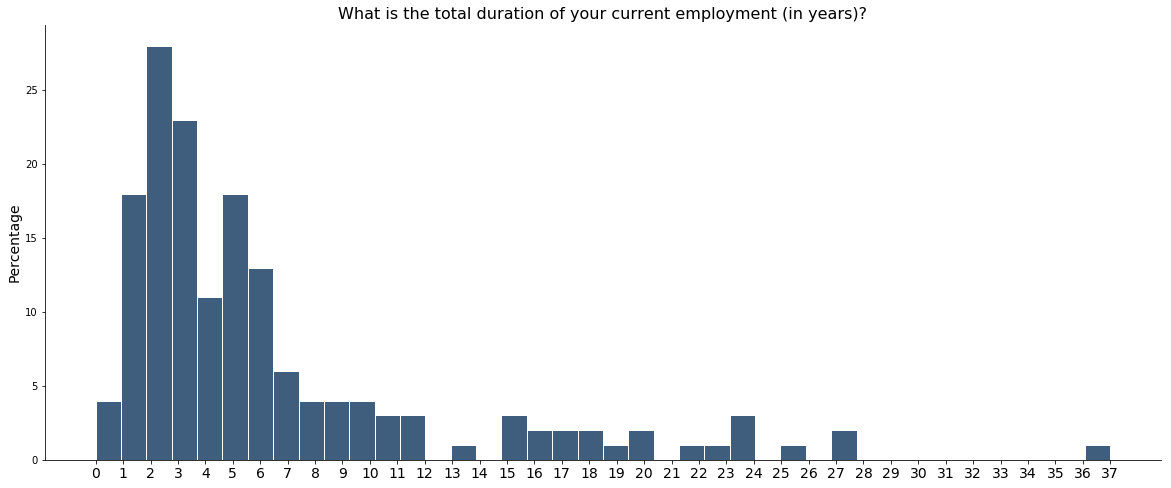

In [92]:
_ = get_plot(v_to_count, "freenumeric")

### Do you know the source of the funding used to support you and your current, largest project?

In [93]:
v_to_count, filename  = get_count(df, ['fund1. Do you know the source of the funding used to support you and your current, largest project?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [94]:
perc_to_count = get_percentage(v_to_count, filename)

In [95]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you know the source of the funding used to s...                            
 Do you know the source of the funding used to ...          134          15   

                                                    NaN value  \
Do you know the source of the funding used to s...              
 Do you know the source of the funding used to ...         15   

                                                    Yes [Percentage]  \
Do you know the source of the funding used to s...                     
 Do you know the source of the funding used to ...              90.0   

                                                    No [Percentage]  
Do you know the source of the funding used to s...                   
 Do you know the source of the funding used to ...             10.0

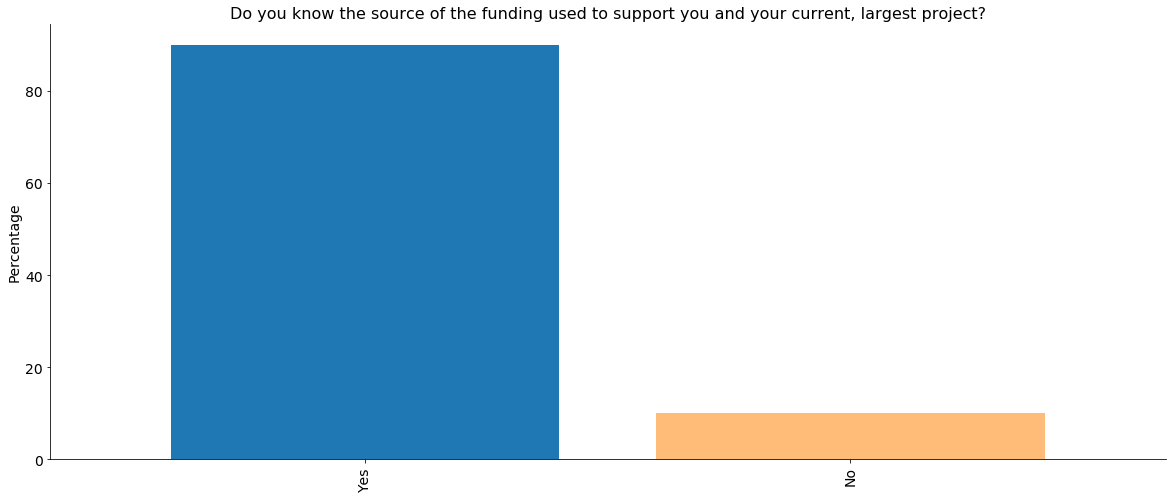

In [96]:
_ = get_plot(perc_to_count, "y/n/na")

### Which of the following sources are used to fund your current, largest project?

In [97]:
v_to_count, filename  = get_count(df, ['fund3[1]. Which of the following sources are used to fund your current, largest project? [I volunteer my time]', 'fund3[2]. Which of the following sources are used to fund your current, largest project? [Funding by institution]', 'fund3[3]. Which of the following sources are used to fund your current, largest project? [Grants]', 'fund3[4]. Which of the following sources are used to fund your current, largest project? [Re-charge or charge-back]', 'fund3[5]. Which of the following sources are used to fund your current, largest project? [Donation button]', 'fund3[6]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (one-time)]', 'fund3[7]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (recurring)]', 'fund3[8]. Which of the following sources are used to fund your current, largest project? [Books & merchandise]', 'fund3[9]. Which of the following sources are used to fund your current, largest project? [Advertising & sponsorships]', 'fund3[10]. Which of the following sources are used to fund your current, largest project? [Industry support]', 'fund3[11]. Which of the following sources are used to fund your current, largest project? [Consulting & services]', 'fund3[12]. Which of the following sources are used to fund your current, largest project? [SaaS]', 'fund3[13]. Which of the following sources are used to fund your current, largest project? [Membership]', 'fund3[14]. Which of the following sources are used to fund your current, largest project? [Dual license]', 'fund3[15]. Which of the following sources are used to fund your current, largest project? [Open core]', 'fund3[16]. Which of the following sources are used to fund your current, largest project? [Foundations & consortiums]', 'fund3[17]. Which of the following sources are used to fund your current, largest project? [Venture capital]', 'fund3[18]. Which of the following sources are used to fund your current, largest project? [Trademark licensing & franchising]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/funding.csv", "False", "./2017/us/output/")

In [98]:
# Removing all the categories that have a 0 as count
v_to_count = v_to_count[v_to_count['Count'] >0]

In [99]:
perc_to_count = get_percentage(v_to_count, filename)

In [100]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which of the following sources are used to fund...                   
Grants                                                 91        51.0
Funding by institution                                 52        29.0
Industry support                                       14         8.0
I volunteer my time                                    11         6.0
Foundations & consortiums                               5         3.0
Consulting & services                                   3         2.0
Re-charge or charge-back                                1         1.0
Membership                                              1         1.0
Trademark licensing & franchising                       1         1.0

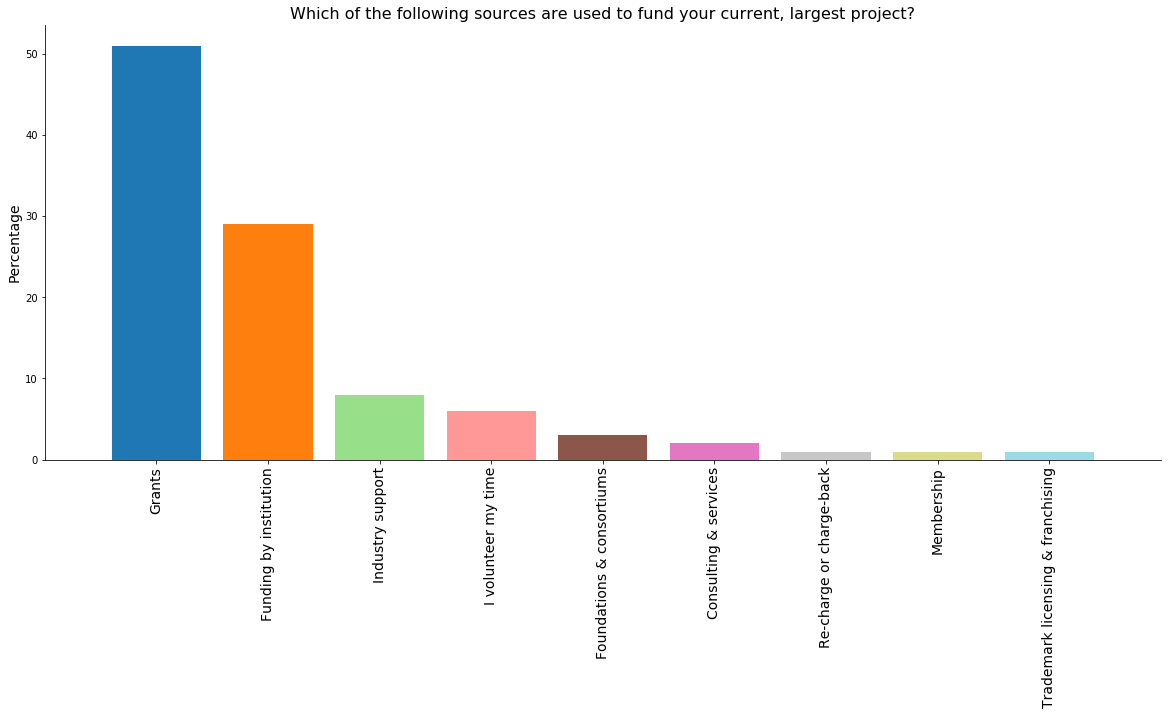

In [101]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources were used to fund your current, largest project three years ago?

In [102]:
v_to_count, filename  = get_count(df, ['fund4[1]. Which of the following sources were used to fund your current, largest project three years ago? [I volunteer my time]', 'fund4[2]. Which of the following sources were used to fund your current, largest project three years ago? [Funding by institution]', 'fund4[3]. Which of the following sources were used to fund your current, largest project three years ago? [Grants]', 'fund4[4]. Which of the following sources were used to fund your current, largest project three years ago? [Re-charge or charge-back]', 'fund4[5]. Which of the following sources were used to fund your current, largest project three years ago? [Donation button]', 'fund4[6]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (one-time)]', 'fund4[7]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (recurring)]', 'fund4[8]. Which of the following sources were used to fund your current, largest project three years ago? [Books & merchandise]', 'fund4[9]. Which of the following sources were used to fund your current, largest project three years ago? [Advertising & sponsorships]', 'fund4[10]. Which of the following sources were used to fund your current, largest project three years ago? [Industry support]', 'fund4[11]. Which of the following sources were used to fund your current, largest project three years ago? [Consulting & services]', 'fund4[12]. Which of the following sources were used to fund your current, largest project three years ago? [SaaS]', 'fund4[13]. Which of the following sources were used to fund your current, largest project three years ago? [Membership]', 'fund4[14]. Which of the following sources were used to fund your current, largest project three years ago? [Dual license]', 'fund4[15]. Which of the following sources were used to fund your current, largest project three years ago? [Open core]', 'fund4[16]. Which of the following sources were used to fund your current, largest project three years ago? [Foundations & consortiums]', 'fund4[17]. Which of the following sources were used to fund your current, largest project three years ago? [Venture capital]', 'fund4[18]. Which of the following sources were used to fund your current, largest project three years ago? [Trademark licensing & franchising]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/funding.csv", "False", "./2017/us/output/")

In [103]:
# Removing all the categories that have a 0 as count
v_to_count = v_to_count[v_to_count['Count'] >0]

In [104]:
perc_to_count = get_percentage(v_to_count, filename)

In [105]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which of the following sources were used to fun...                   
Grants                                                 83        50.0
Funding by institution                                 48        29.0
I volunteer my time                                    13         8.0
Industry support                                       10         6.0
Foundations & consortiums                               5         3.0
Consulting & services                                   4         2.0
Donation button                                         1         1.0
Re-charge or charge-back                                1         1.0
Trademark licensing & franchising                       1         1.0

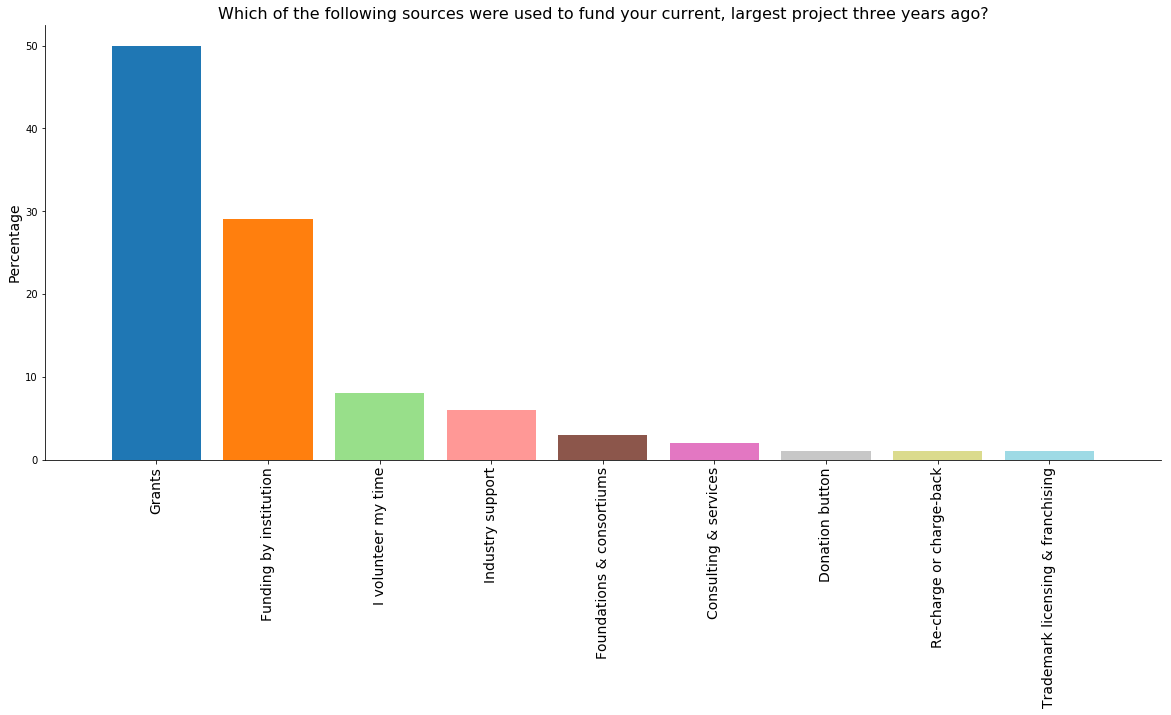

In [106]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources are used to pay for your effort as an RSE/equivalent?

In [107]:
v_to_count, filename  = get_count(df, ['fund2[1]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [I volunteer my time]', 'fund2[2]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Funding by institution]', 'fund2[3]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Grants]', 'fund2[4]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Re-charge or charge-back]', 'fund2[5]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Donation button]', 'fund2[6]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (one-time)]', 'fund2[7]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (recurring)]', 'fund2[8]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Books & merchandise]', 'fund2[9]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Advertising & sponsorships]', 'fund2[10]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Industry support]', 'fund2[11]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Consulting & services]', 'fund2[12]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [SaaS]', 'fund2[13]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Membership]', 'fund2[14]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Dual license]', 'fund2[15]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Open core]', 'fund2[16]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Foundations & consortiums]', 'fund2[17]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Venture capital]', 'fund2[18]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Trademark licensing & franchising]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/funding.csv", "False", "./2017/us/output/")

In [108]:
# Removing all the categories that have a 0 as count
v_to_count = v_to_count[v_to_count['Count'] >0]

In [109]:
perc_to_count = get_percentage(v_to_count, filename)

In [110]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which of the following sources are used to pay ...                   
Grants                                                 98        44.0
Funding by institution                                 75        33.0
I volunteer my time                                    22        10.0
Industry support                                       12         5.0
Foundations & consortiums                               7         3.0
Consulting & services                                   5         2.0
Re-charge or charge-back                                3         1.0
Membership                                              1         0.0
Venture capital                                         1         0.0
Trademark licensing & franchising                       1         0.0

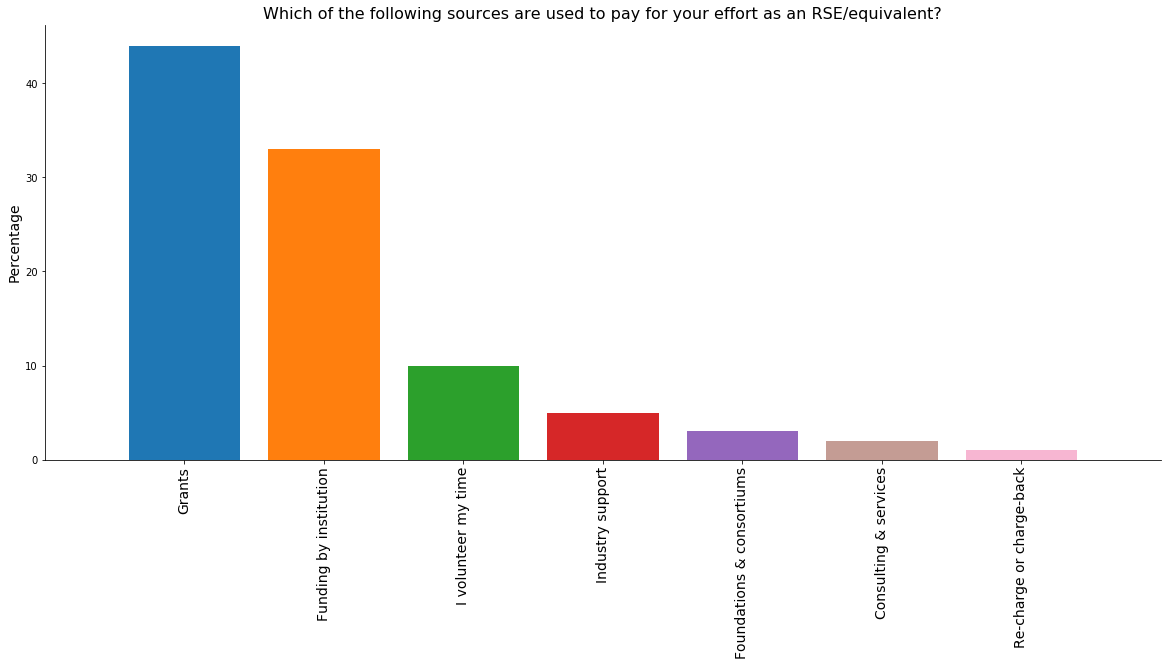

In [111]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 5. Questions about previous employment

Several questions were about the participants previous job. The idea is to collect insights of their career and understand what are their motivations to be an RSE.

Almost half of the participants worked in a university prior to their current position (48%) but an interesting big number comes from Private companies (23%) showing a different path of career. For the last significative portion of RSEs, it is their first job (17%).

We asked the participants to rank the reasons why they chose their actual position among 8 different ones:
* Desire to work in a research environment
* Freedom to choose own working practices
* Desire to advance research
* I want to learn new skills
* Opportunity to develop software
* Flexible working hours
* Ability to work across disciplines
* Opportunity for career advancement
* The salary

It appears that the desire to advance research, the desire to work in a research environment and the Freedom to choose own working practices and the  are more often ranked as the first reasons than any others one. On the contraries, the Opportunity for career advancement and the salary are the least common reasons for choosing a position as RSE.

### Where was your previous job based?

In [112]:
v_to_count, filename  = get_count(df, ['prevEmp1. Where was your previous job based?'], "one choice", "./../survey_creation/2017/us/listAnswers/previous_job.csv", "False", "./2017/us/output/")

In [113]:
perc_to_count = get_percentage(v_to_count, filename)

In [114]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Where was your previous job based?                   
University                             76        48.0
Private company                        37        23.0
This is my first job                   27        17.0
National laboratory                    10         6.0
Other government agency                 5         3.0
Other non-profit                        3         2.0
NaN                                     6         NaN

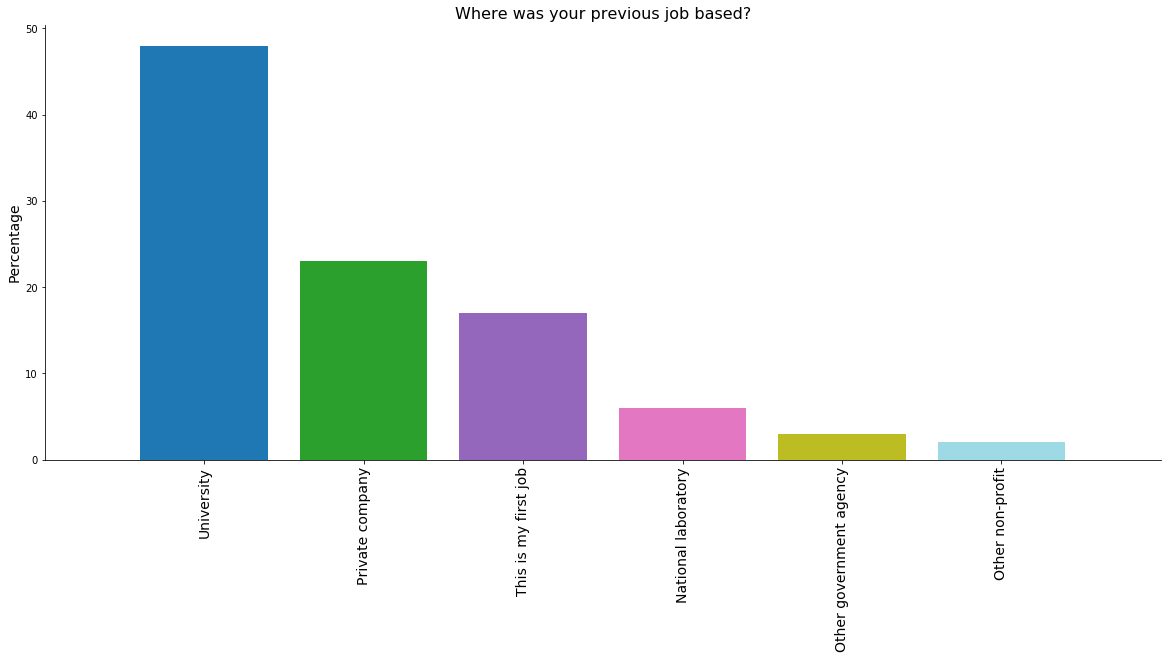

In [115]:
_ = get_plot(perc_to_count, "one choice")

### Rank the following factors dependent on how strongly they influenced your decision to accept your current position

In [116]:
v_to_count, filename  = get_count(df, ['prevEmp2[1]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 1]', 'prevEmp2[2]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 2]', 'prevEmp2[3]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 3]', 'prevEmp2[4]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 4]', 'prevEmp2[5]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 5]'], "ranking", "./../survey_creation/2017/us/listAnswers/decision_job.csv", "False", "./2017/us/output/")

In [117]:
perc_to_count = get_percentage(v_to_count, filename)

In [118]:
display_side_by_side(v_to_count,perc_to_count)

Rank 1 [Count]  Rank 2 [Count]  \
Reasons to choose this job                                                     
Desire to advance research                                36              20   
Desire to work in a research environment                  31              29   
Freedom to choose own working practices                   18              10   
Long-term prospects for continued employment              17               7   
I want to learn new skills                                16              18   
Opportunity to develop software                           13              22   
Flexible working hours                                     8              12   
Ability to work across disciplines                         7              17   
The salary                                                 6               6   
Opportunity for career advancement                         2              11   
NaN                                                       10              12   

                                              Rank 3 [Count]  Rank 4 [Count]  \
Reasons to choose this job                                                     
Desire to advance research                                12              11   
Desire to work in a research environment                  17              20   
Freedom to choose own working practices                   20              25   
Long-term prospects for continued employment              11               8   
I want to learn new skills                                 8              12   
Opportunity to develop software                           21              13   
Flexible working hours                                    21              12   
Ability to work across disciplines                        19              19   
The salary                                                 6              11   
Opportunity for career advancement                        15              11   
NaN                                                       14              22   

                                              Rank 5 [Count]  \
Reasons to choose this job                                     
Desire to advance research                                15   
Desire to work in a research environment                  15   
Freedom to choose own working practices                    8   
Long-term prospects for continued employment              13   
I want to learn new skills                                19   
Opportunity to develop software                            8   
Flexible working hours                                    15   
Ability to work across disciplines                        13   
The salary                                                 9   
Opportunity for career advancement                        10   
NaN                                                       39   

                                              Rank 1 [Percentage]  \
Reasons to choose this job                                          
Desire to advance research                                   38.0   
Desire to work in a research environment                     28.0   
Freedom to choose own working practices                      22.0   
Long-term prospects for continued employment                 30.0   
I want to learn new skills                                   22.0   
Opportunity to develop software                              17.0   
Flexible working hours                                       12.0   
Ability to work across disciplines                            9.0   
The salary                                                   16.0   
Opportunity for career advancement                            4.0   
NaN                                                           NaN   

                                              Rank 2 [Percentage]  \
Reasons to choose this job                                          
Desire to advance research                                   21.0   
Desire to work in a resear

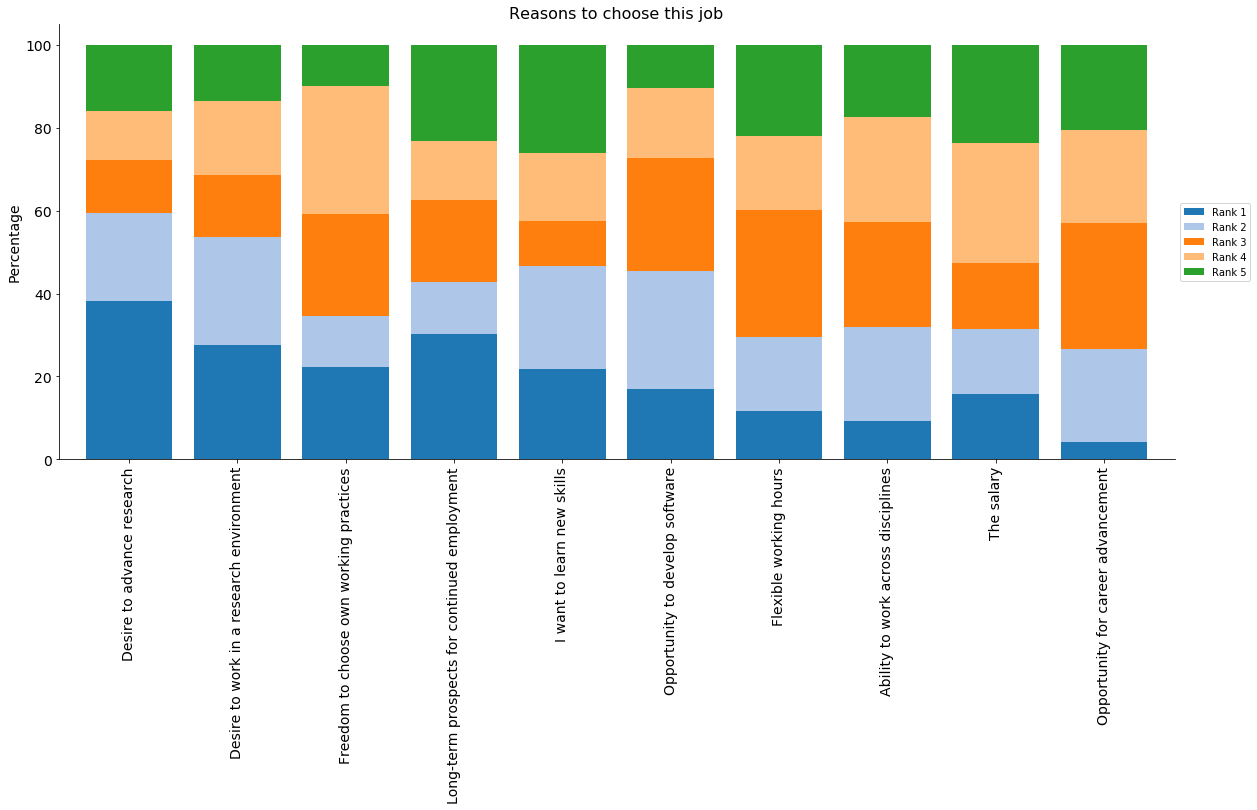

In [119]:
_ = get_plot(perc_to_count, "ranking")

# Section 6. Collaboration and training

RSEs do not work for themselves, their role involves writing code that is used by others (as seen in section 2). This is why we asked if they are embedded in a stable structure and whom the participants work with. 43% of them are within a Research Software Group which leave the majority of them without appropriate institutional support.

On the side of collaboration, we wanted to know if they were working within a stable group of researcher software. Usually, they seems to work with different researchers 57% while slight minority work constantly for the same people (43%). 

Working for researchers or working within a research software group is different than working on the same project with other developers. On average they work on a bit more than 3 different projects at the same time.

RSEs have programming skills that is not necessarily shared within their field. Therefore, they can train other researchers to develop some best practices or learn how to program more efficiently. 78% of them participate to such training. They are not teaching directly to students (as seen in section 2) but transferring skills is an important aspect of their job. In average, they do training twice a year. In average, they do training six times a year (by removing any participants who claimed to do more than 52 trainings per year). These trainings are more often done under the form of workshop or with Software Carpentry than traditional teaching. A type of training probably more adapted to teach computing skills.

## Collaboration

### Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?

In [120]:
v_to_count, filename  = get_count(df, ['currentWork1. Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?'], "one choice", "./../survey_creation/2017/us/listAnswers/work_researchers.csv", "False", "./2017/us/output/")

In [121]:
perc_to_count = get_percentage(v_to_count, filename)

In [122]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you always work with the same researcher(s),...                   
Regularly change researcher(s)                         79        52.0
Same researcher(s)                                     73        48.0
NaN                                                    12         NaN

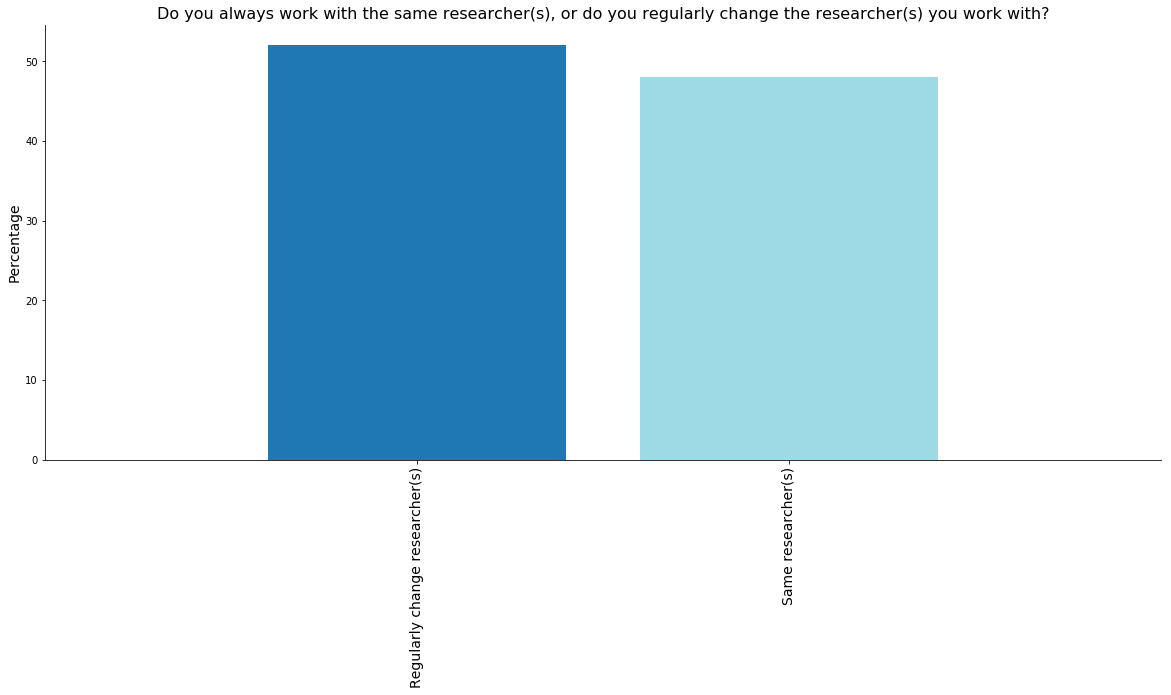

In [123]:
_ = get_plot(perc_to_count, "one choice")

### Do you work for a Research Software Group?

In [124]:
v_to_count, filename  = get_count(df, ['currentWork2. Do you work for a Research Software Group?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [125]:
perc_to_count = get_percentage(v_to_count, filename)

In [126]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you work for a Research Software Group?                             
 Do you work for a Research Software Group?           63          82   

                                             NaN value  Yes [Percentage]  \
Do you work for a Research Software Group?                                 
 Do you work for a Research Software Group?         19              43.0   

                                             No [Percentage]  
Do you work for a Research Software Group?                    
 Do you work for a Research Software Group?             57.0

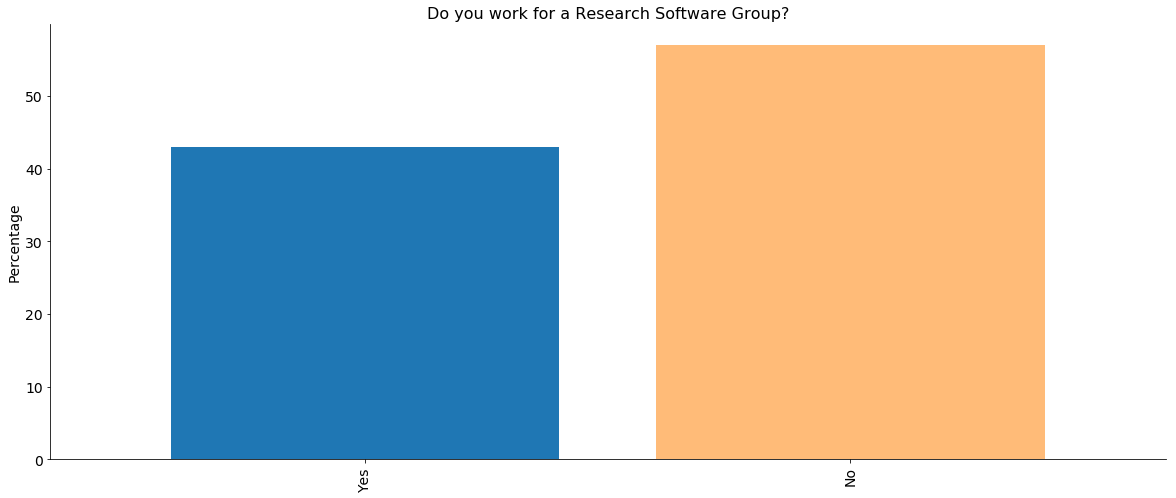

In [127]:
_ = get_plot(perc_to_count, "y/n/na")

### How many software projects are you currently involved in?

In [128]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved in?'], "freenumeric", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

       proj1can. How many software projects are you currently involved in?
count                                         147.000000                  
mean                                            3.836735                  
std                                             4.159559                  
min                                             0.000000                  
25%                                             2.000000                  
50%                                             3.000000                  
75%                                             4.000000                  
max                                            32.000000                  


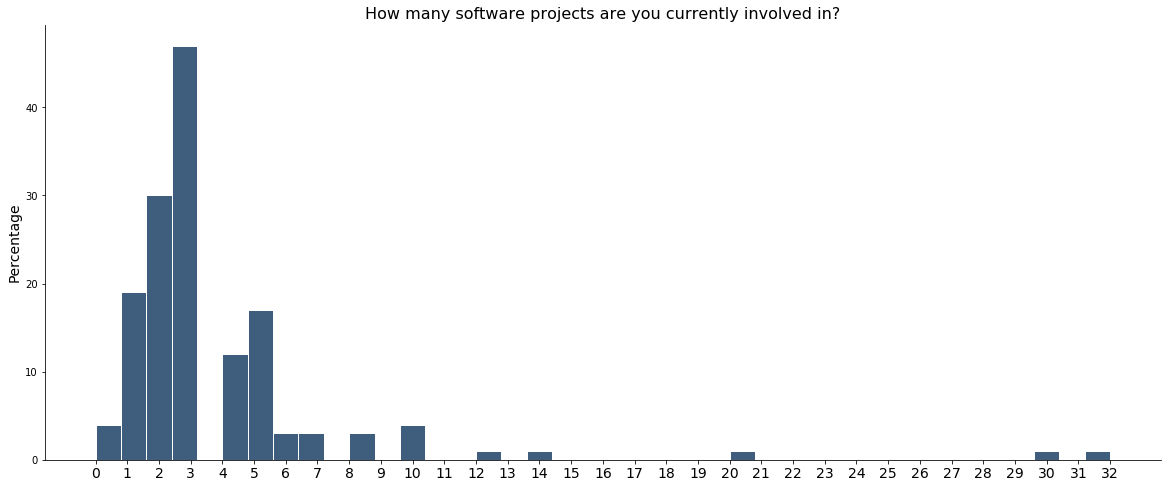

In [129]:
_ = get_plot(v_to_count, "freenumeric")

## Training

### Have you ever trained researchers in computational techniques?

In [130]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [131]:
perc_to_count = get_percentage(v_to_count, filename)

In [132]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever trained researchers in computatio...                            
 Have you ever trained researchers in computati...          115          32   

                                                    NaN value  \
Have you ever trained researchers in computatio...              
 Have you ever trained researchers in computati...         17   

                                                    Yes [Percentage]  \
Have you ever trained researchers in computatio...                     
 Have you ever trained researchers in computati...              78.0   

                                                    No [Percentage]  
Have you ever trained researchers in computatio...                   
 Have you ever trained researchers in computati...             22.0

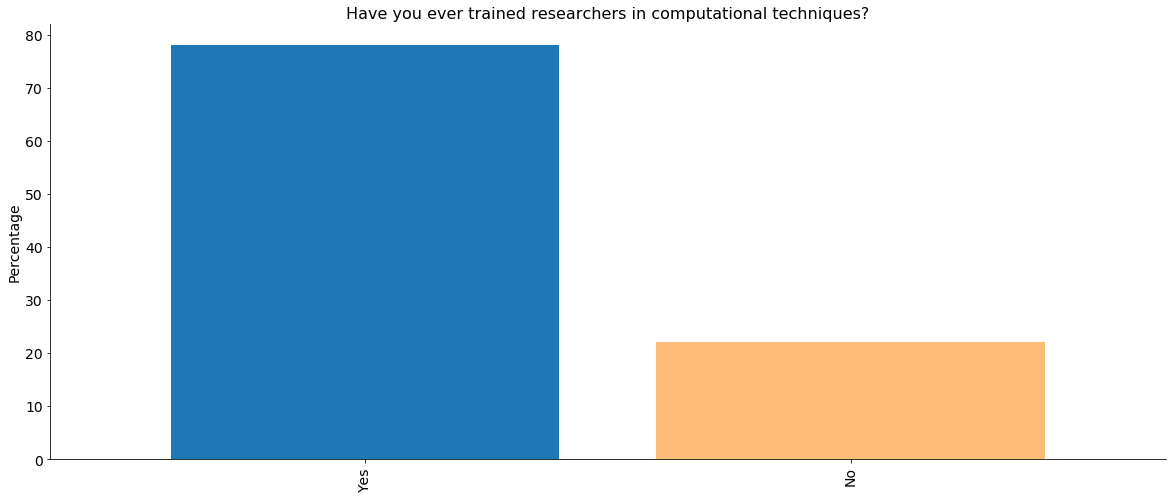

In [133]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [134]:
df['train2. On average, how many times a year do you take part in providing training?'] = df['train2. On average, how many times a year do you take part in providing training?'].apply(lambda x: x if x <= 53 else np.nan)

In [135]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

       train2. On average, how many times a year do you take part in providing training?
count                                         106.000000                                
mean                                            6.577830                                
std                                            10.880595                                
min                                             0.000000                                
25%                                             2.000000                                
50%                                             3.000000                                
75%                                             5.000000                                
max                                            52.000000                                


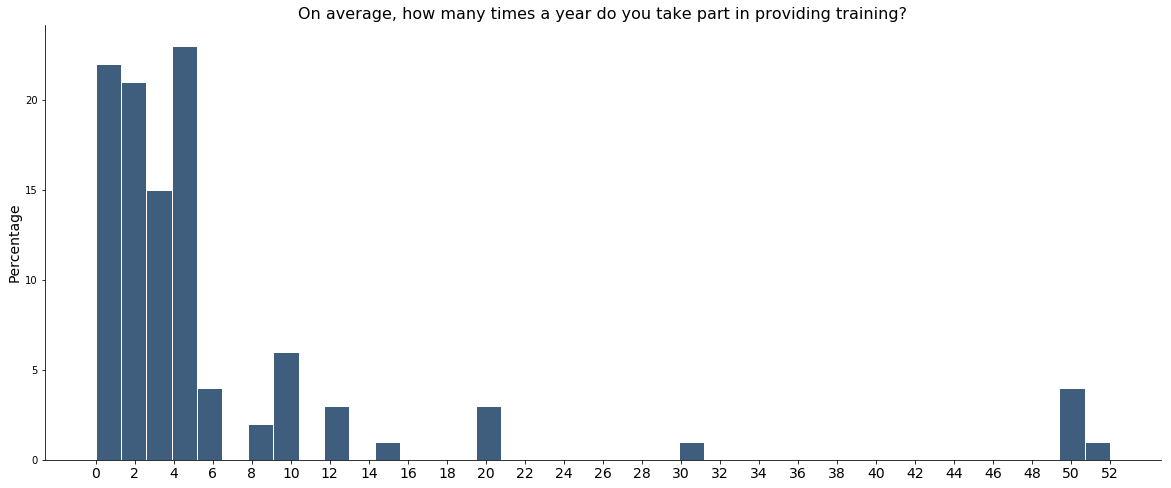

In [136]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)

In [137]:
data = df['train3. What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)'].dropna()
data = [z.replace('/', ',').replace(';', ',').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
print('There are {} propositions'.format(len(data)))

There are 173 propositions


In [138]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Local University Training 30
Software Carpentry 24
Data Carpentry 9
Workshops 3
Local University 3
Local 2
Petsc Tutorials 2
Xsede 2
Software 1
Usgs-Training 1
Lectures 1
Meetings 1
International Summer Schools 1
Open Science For Synthesis (Oss) 1
Nceas 1
Arctic Data Center 1
Dataone 1
Within My Lab 1
Unbranded Workshops At Conferences 1
Informal 1
Local Reu Program (Teaching Undergrads Research Methods) 1
Developer Sprints At Scipy Conference 1
Local Workshops And Workshops By International Centre For Theoretical Physics 1
As Part Of Classes I Teach 1
Workshops For Local Research Groups 1
Cig Webinar 1
Software Carpentry (Once) 1
Individualized Training 1
Teaching Graduate Students 1
Outreach To High Schoolers 1
Assisting Graduate Students 1
Tutorials 1
Training Provided By Supercomputer Center 1
On-Demand Consulting 1
Classes 1
Scientific Workflows 1
Consultation Via Ticketing System 1
Informal Departmental Training 1
Undergrad And Grad Classes 1
Training 1
Optimization 1
Debugging 1

In [139]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)'])

(-0.5, 1499.5, 799.5, -0.5)

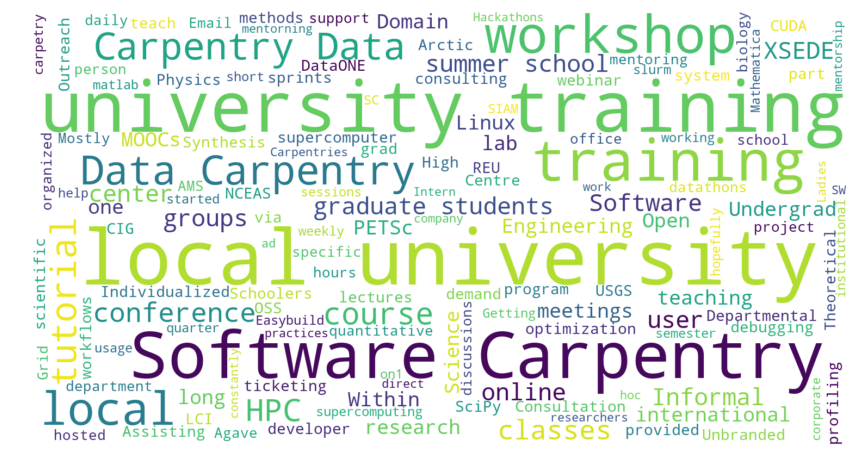

In [140]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 7. Publications

RSEs is an hybrid role between a researcher and a software developer. We investigated both of these aspects concerning publication and dissemination of their work, one on the traditional aspect of it (publications and conference) and on the more software aspect (open source and DOI).
One essential aspect of career in academia is the publications and the conferences to gain recognition. However, the role of RSE being less about writing articles than creating the infrastructure and the software for the article to exist, there is some fear that they will fail to have recognition through the papers and conferences.
Our results support this idea, while for 90% of the participants, their software is used in published researches they are only 71% (among them) who are acknowledged in the publication.

Among these participants that are acknowledged in the paper, only 29% are generally named as main author for the paper. Among the 71% of those who are not main author, 80% are at least mentioned as co-authors. And among these RSEs that are not mentioned as co-author or main author, 54% are at least generally acknowledged in the main text of the paper.
On conference, the number of RSEs that present their work in conference is rather small, only 65% of RSEs present their work in conferences or workshops.


One important development practice is how the code is distributed and if the RSEs are releasing their work under open licence.
We asked the participants if they have ever released their work under open source licence and 81% of them replied by the affirmative. 
It is seems that they mainly doing it all the time (40%), followed by the score 9 on the 10 item scale (13%). Therefore, as soon as the step to open source is done, it seems that RSEs seems a constant interest in it. However, they rarely use a Digital Object Identifier (DOI) to help to identify their software, only 32% of them are doing it. And the frequency of use of the DOI among them is much more variable than for the open licence meaning they are less convince by the utility of it compared to open licence.

## Academic publications

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [141]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [142]:
perc_to_count = get_percentage(v_to_count, filename)

In [143]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Publications                                                                  
 Has your software contributed to research that...          129          15   
 In general, when your software contributes to ...           92          38   
 Are you generally named as the main author of ...           26          65   
 Are you generally named as a co-author of the ...           52          13   
 Are you generally acknowledged in the main tex...            7           6   

                                                    NaN value  \
Publications                                                    
 Has your software contributed to research that...         20   
 In general, when your software contributes to ...         34   
 Are you generally named as the main author of ...         73   
 Are you generally named as a co-author of the ...         99   
 Are you generally acknowledged in the main tex...        151   

                                                    Yes [Percentage]  \
Publications                                                           
 Has your software contributed to research that...              90.0   
 In general, when your software contributes to ...              71.0   
 Are you generally named as the main author of ...              29.0   
 Are you generally named as a co-author of the ...              80.0   
 Are you generally acknowledged in the main tex...              54.0   

                                                    No [Percentage]  
Publications                                                         
 Has your software contributed to research that...             10.0  
 In general, when your software contributes to ...             29.0  
 Are you generally named as the main author of ...             71.0  
 Are you generally named as a co-author of the ...             20.0  
 Are you generally acknowledged in the main tex...             46.0

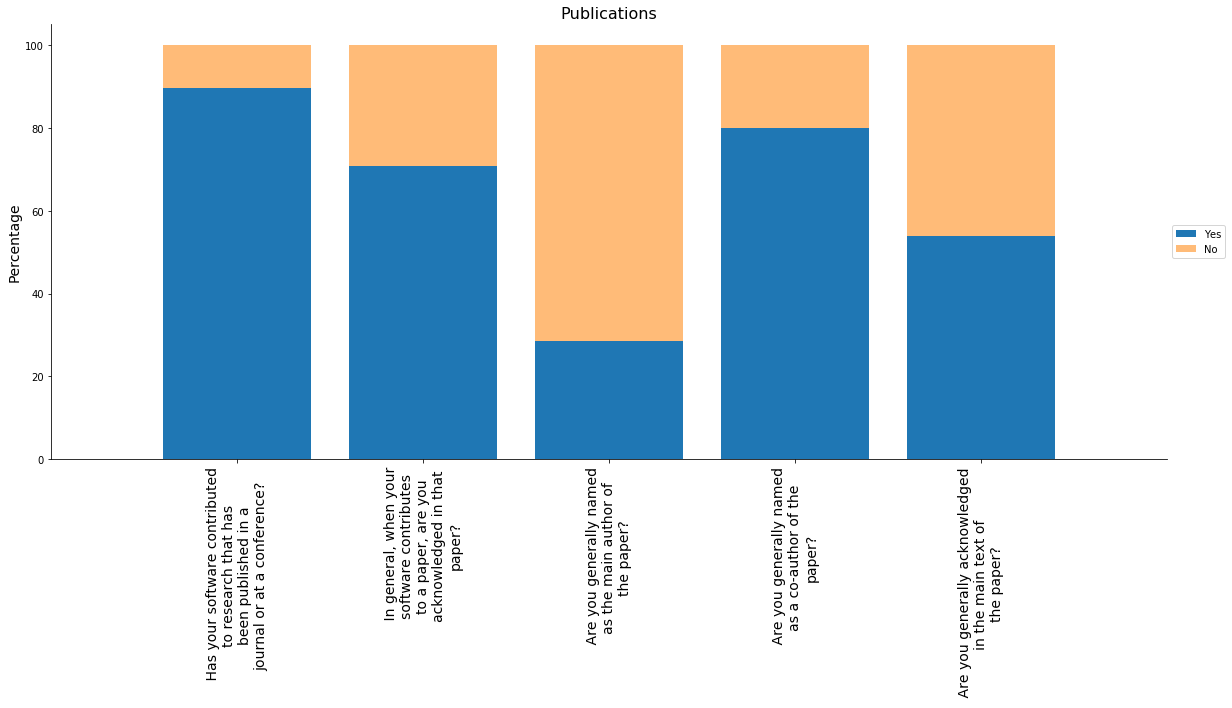

In [144]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [145]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [146]:
perc_to_count = get_percentage(v_to_count, filename)

In [147]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever presented your software work at a...                            
 Have you ever presented your software work at ...           93          49   

                                                    NaN value  \
Have you ever presented your software work at a...              
 Have you ever presented your software work at ...         22   

                                                    Yes [Percentage]  \
Have you ever presented your software work at a...                     
 Have you ever presented your software work at ...              65.0   

                                                    No [Percentage]  
Have you ever presented your software work at a...                   
 Have you ever presented your software work at ...             35.0

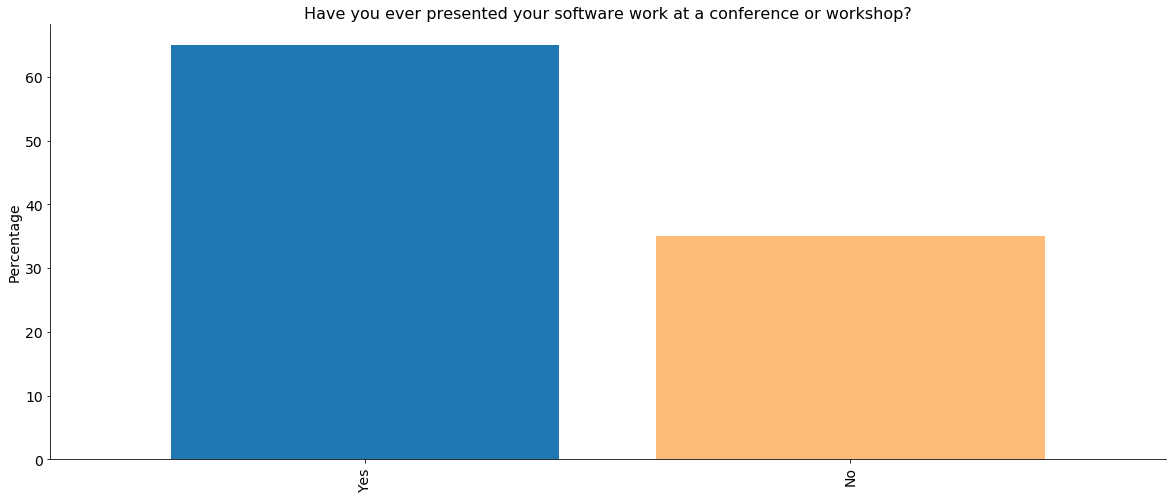

In [148]:
_ = get_plot(perc_to_count, "y/n/na")

### Which conference(s)/workshop(s) (comma separated list with FULLNAME (ACRONYM))

In [149]:
 wc = wordcloud(df, ['conf2can. Which conference(s)/workshop(s) (comma separated list with FULLNAME (ACRONYM))'])

(-0.5, 1499.5, 799.5, -0.5)

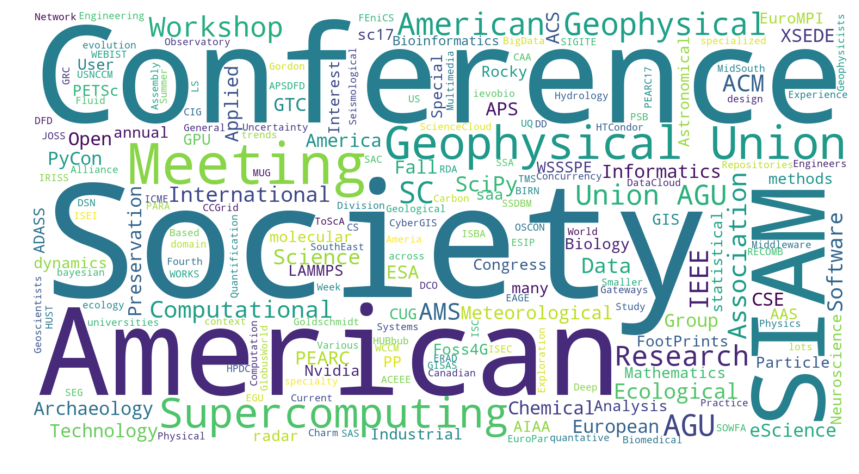

In [150]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

## Open Source

### Have you ever released your software under an open-source license?

In [151]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source license?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [152]:
perc_to_count = get_percentage(v_to_count, filename)

In [153]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever released your software under an o...                            
 Have you ever released your software under an ...          120          29   

                                                    NaN value  \
Have you ever released your software under an o...              
 Have you ever released your software under an ...         15   

                                                    Yes [Percentage]  \
Have you ever released your software under an o...                     
 Have you ever released your software under an ...              81.0   

                                                    No [Percentage]  
Have you ever released your software under an o...                   
 Have you ever released your software under an ...             19.0

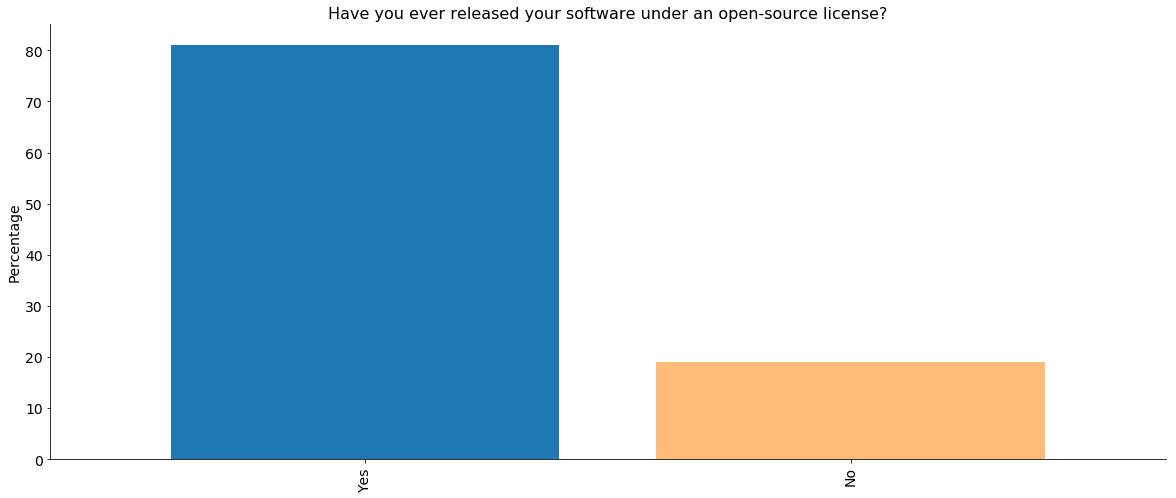

In [154]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source license?

In [155]:
v_to_count, filename  = get_count(df, ["open1can[SQ001]. How often do you release the software projects you've worked on under an open-source license? []"], "likert", "./../survey_creation/2017/us/listAnswers/likert_time_10.csv", "True", "./2017/us/output/")

In [156]:
perc_to_count = get_percentage(v_to_count, filename)

In [157]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How often do you release the software projects ...                   
1 (Never)                                             NaN         0.0
2                                                     6.0         5.0
3                                                     4.0         3.0
4                                                     3.0         3.0
5                                                    11.0         9.0
6                                                     5.0         4.0
7                                                     9.0         8.0
8                                                    17.0        14.0
9                                                    16.0        13.0
10 (Always)                                          48.0        40.0

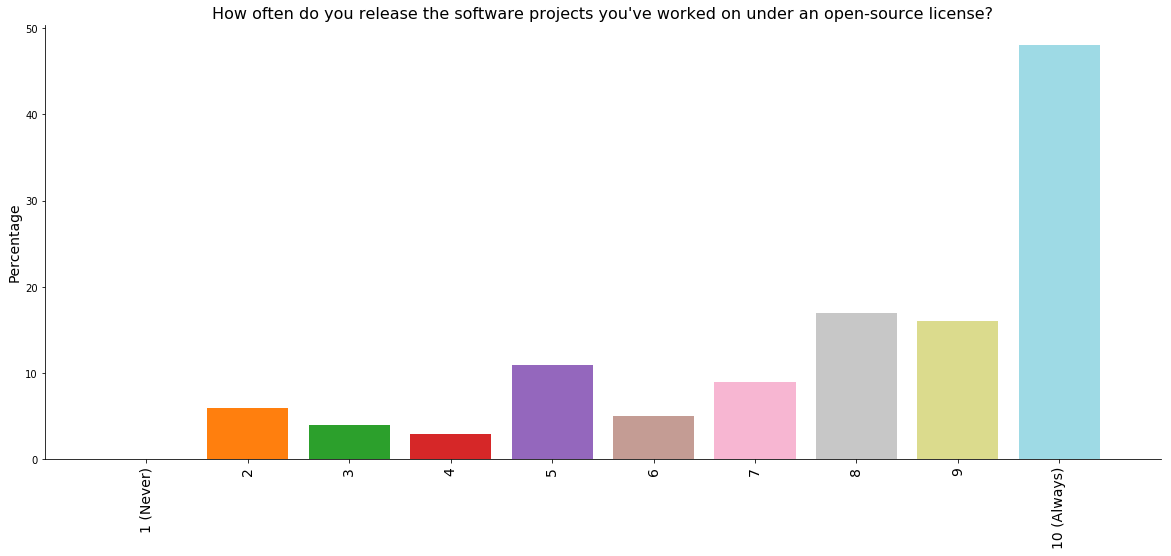

In [158]:
_ = get_plot(v_to_count, "likert")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [159]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [160]:
perc_to_count = get_percentage(v_to_count, filename)

In [161]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever used a Digital Object Identifier ...                            
 Have you ever used a Digital Object Identifier...           48         100   

                                                    NaN value  \
Have you ever used a Digital Object Identifier ...              
 Have you ever used a Digital Object Identifier...         16   

                                                    Yes [Percentage]  \
Have you ever used a Digital Object Identifier ...                     
 Have you ever used a Digital Object Identifier...              32.0   

                                                    No [Percentage]  
Have you ever used a Digital Object Identifier ...                   
 Have you ever used a Digital Object Identifier...             68.0

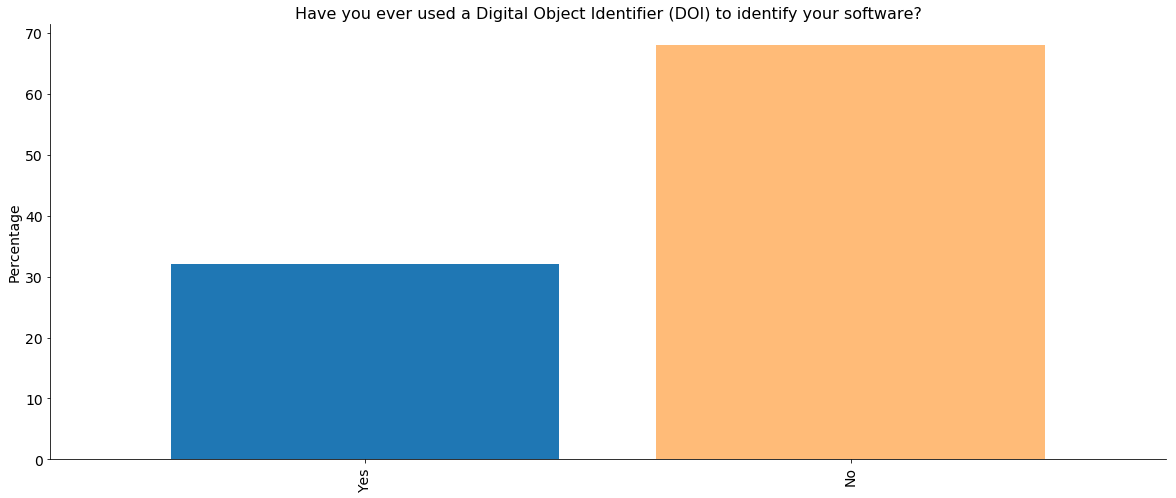

In [162]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [163]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../survey_creation/2017/us/listAnswers/likert_time_10.csv", "True", "./2017/us/output/")

In [164]:
perc_to_count = get_percentage(v_to_count, filename)

In [165]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How often do you associate your software with a...                   
1 (Never)                                             NaN         0.0
2                                                     3.0         6.0
3                                                     5.0        11.0
4                                                     2.0         4.0
5                                                    12.0        26.0
6                                                     3.0         6.0
7                                                     4.0         9.0
8                                                    10.0        21.0
9                                                     3.0         6.0
10 (Always)                                           5.0        11.0

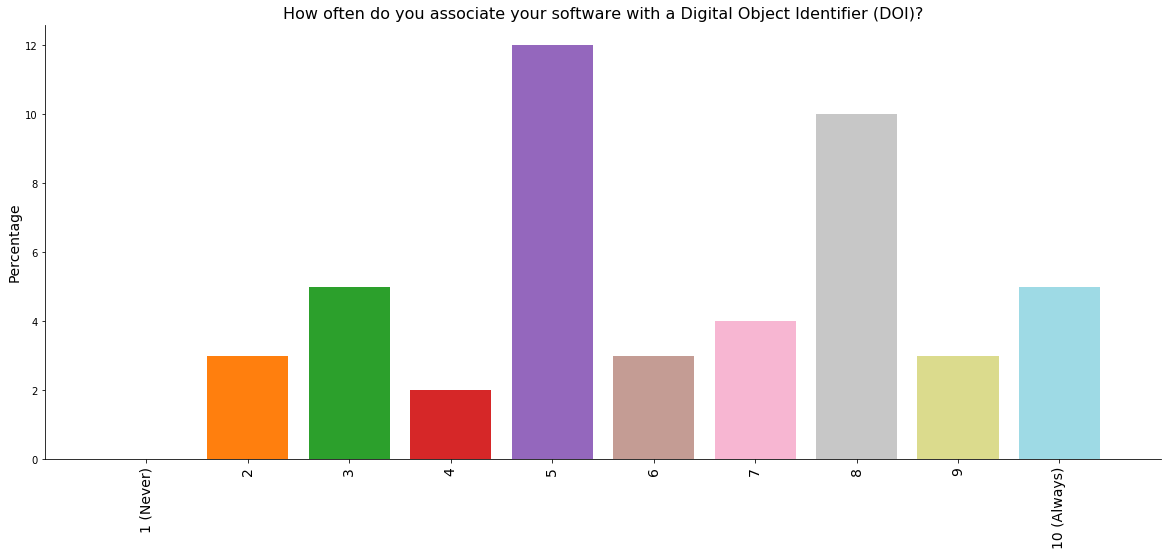

In [166]:
_ = get_plot(v_to_count, "likert")

# Section 8. Sustainability and technical details

This section comprises two subsections that focus on the technical and development aspects of the RSEs' work. They aim to understand good practices in developing software and which tools are important for RSEs.

Developing software requires a set of good practices to ensure the quality of the subsequent analysis as well as the robustness of the developed software, to name a few of important aspects. We wanted to see if the implementation of some simple but essential good practices were a reality. Three measures were created, the implementation of testing, the bus factor and the technical hand over plan.
These metrics allows to see the importance of the RSEs role in their team but also if they are themselves implementing some practices that are used widely in industry but less in academic research.

We asked the participants to choose any of the following testing methods:
* Test engineers conduct testing
* Developers conduct testing
* Users conduct testing
* No formal testing

Obviously, the *test engineers conduct testing* is the most potential testing method but may not be possible in number of small projects while, no formal testing should not occur in any ideal scenario, regardless of the size of the project. Only 7% of the participants confessed they were not implementing any testing at all. When they are conducting testing, the RSEs seems to prefer (or only able to implement) *developer testing* (52% of them) or letting the users conduct the testing (35%), while the use of test engineers is marginal (6%).

We chose two broad measures to provide an insight into sustainability: the bus factor and technical hand over planning. The bus factor is a measure of the number of developers who understand a specific software project and could, with only a cursory review of the project, maintain or extend the code. A project with a bus factor of 1 is completely reliant on only one developer. If this developer finds new employment, becomes ill or is hit by the titular bus, then the project will fail. A high bus factor provides some confidence that the project can be sustained even if a developer leaves. A technical hand over plan is used to introduce a new developer to a software project. These plans cover basic information, such as the licence and location of the software, a repository, a description of the software architecture, a summary of development plans and any other information that a new developer would need to understand the software. A project that has written (and maintained) a technical hand over plan can withstand the departure of a developer, even a key developer, significantly better than one without such a plan.

On majority of the RSEs' projects the bus factor is low, 39% of the project have a bus factor of 1 followed by a bus factor of 2 (27%). Higher bus factor is only marginal with only 13% of the projects having a bus factor of 3, 5% of a bus factor of 4 and 7% a bus factor equal or higher than 5.
The presence of a technical plan, which can mitigate the low bus factor in the different projects is really low (18%) and presents a risk of project failures.


On technical details we wanted to know which of the programming languages are mostly used by the RSEs. We give them a multi-choice list inspired by the [results](https://insights.stackoverflow.com/survey/2017#most-popular-technologies) published by Stackoverflow. Python is the most used language (18%) followed by C, C++ and R (10% each). The rests of the languages that are higher than 5% are Fortran (8%), SQL (7%), Matlab (7%) and JavaScript (7%).
About which Operating System used by RSEs, a majority are using GNU/Linux (54%) followed by OS X (35%) and Windows (10%).

## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [167]:
v_to_count, filename  = get_count(df, ['proj4can[1]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[2]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[3]. In general, what sort of testing do you conduct on your software? (check all that apply) [Test engineers conduct testing]', 'proj4can[4]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/testing.csv", "False", "./2017/us/output/")

In [168]:
perc_to_count = get_percentage(v_to_count, filename)

In [169]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In general, what sort of testing do you conduct...                   
Developers conduct testing                            137        52.0
Users conduct testing                                  92        35.0
No formal testing                                      18         7.0
Test engineers conduct testing                         15         6.0

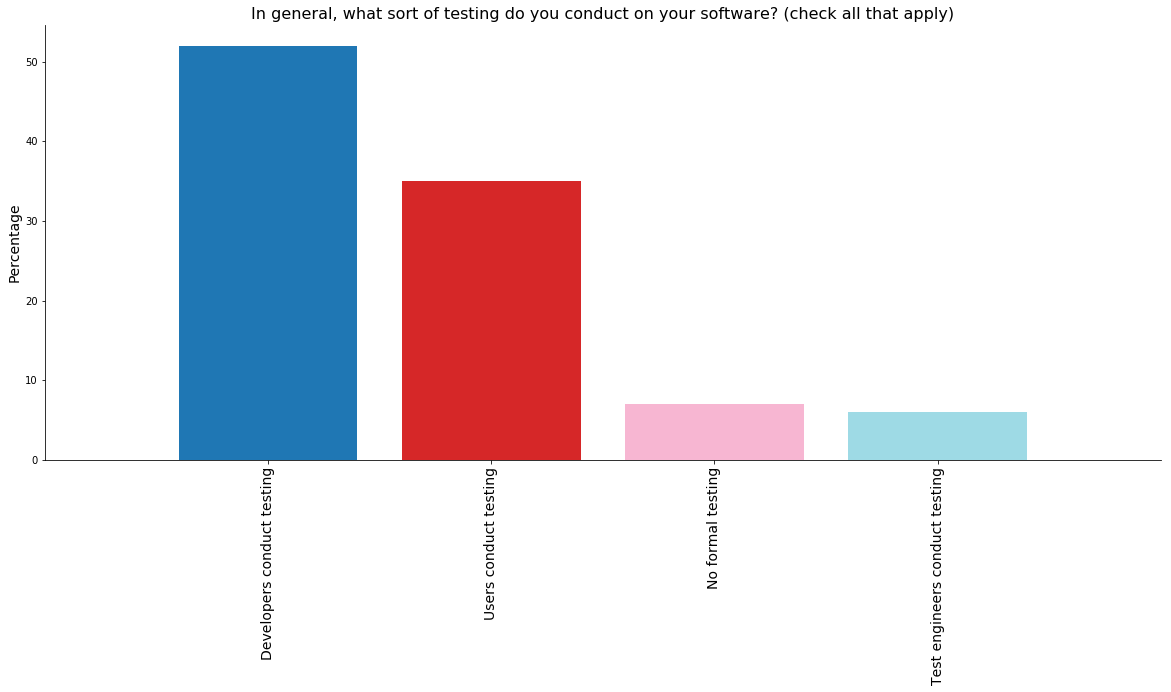

In [170]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project? (the bus factor is the number of team members who, if run over by a bus, would put the project in jeopardy, so 1 means the project is dependent on a single person)

In [171]:
v_to_count, filename  = get_count(df, ['stability1[SQ001]. What is the bus factor of your most important software project? (the bus factor is the number of team members who, if run over by a bus, would put the project in jeopardy, so 1 means the project is dependent on a single person) []'], "likert", "./../survey_creation/2017/us/listAnswers/bus_factor.csv", "False", "./2017/us/output/")

In [172]:
perc_to_count = get_percentage(v_to_count, filename)

In [173]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What is the bus factor of your most important s...                   
1                                                      56        39.0
2                                                      51        36.0
3                                                      18        13.0
4                                                       7         5.0
5+                                                     10         7.0

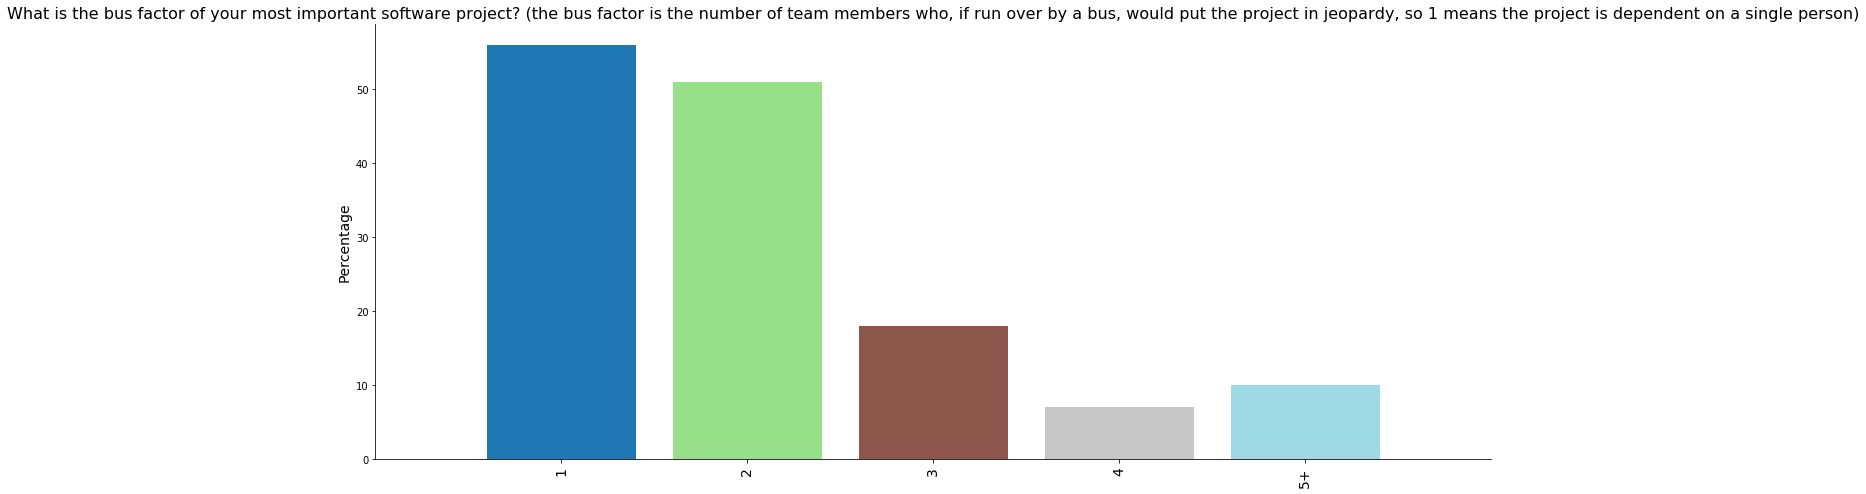

In [174]:
_ = get_plot(v_to_count, "likert")

### Is there a technical hand-over plan for your most important software project?

In [175]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical hand-over plan for your most important software project?'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [176]:
perc_to_count = get_percentage(v_to_count, filename)

In [177]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Is there a technical hand-over plan for your mo...                            
 Is there a technical hand-over plan for your m...           25         113   

                                                    NaN value  \
Is there a technical hand-over plan for your mo...              
 Is there a technical hand-over plan for your m...         26   

                                                    Yes [Percentage]  \
Is there a technical hand-over plan for your mo...                     
 Is there a technical hand-over plan for your m...              18.0   

                                                    No [Percentage]  
Is there a technical hand-over plan for your mo...                   
 Is there a technical hand-over plan for your m...             82.0

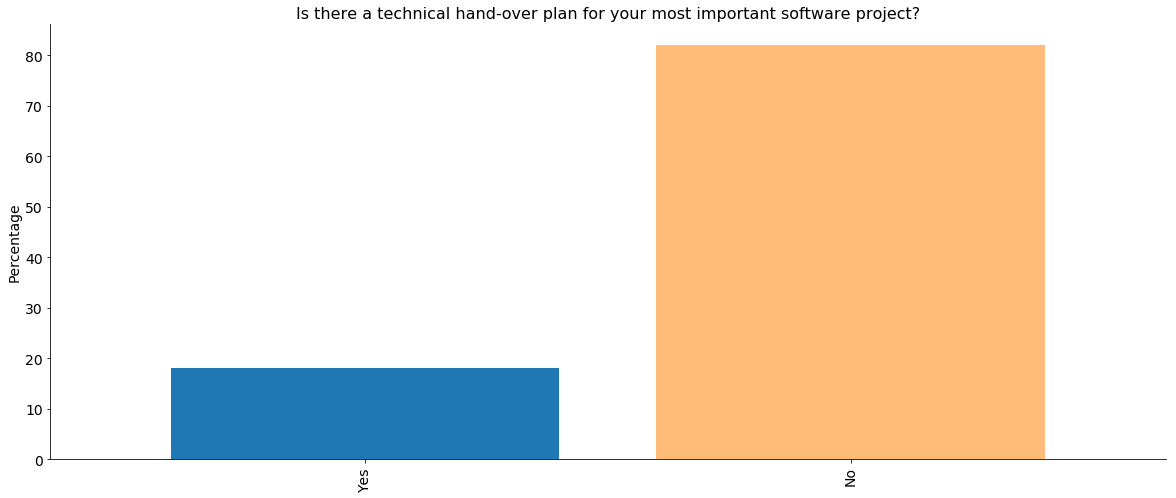

In [178]:
_ = get_plot(perc_to_count, "y/n/na")

## Technical details

### What programming languages do you use at work? (Select as many as apply)

In [179]:
v_to_count, filename  = get_count(df, ['tool4can[1]. What programming languages do you use at work? (Select as many as apply) [Swift]', 'tool4can[2]. What programming languages do you use at work? (Select as many as apply) [JavaScript]', 'tool4can[3]. What programming languages do you use at work? (Select as many as apply) [R]', 'tool4can[4]. What programming languages do you use at work? (Select as many as apply) [PHP]', 'tool4can[5]. What programming languages do you use at work? (Select as many as apply) [C]', 'tool4can[6]. What programming languages do you use at work? (Select as many as apply) [Common Lisp]', 'tool4can[7]. What programming languages do you use at work? (Select as many as apply) [Erlang]', 'tool4can[8]. What programming languages do you use at work? (Select as many as apply) [Smalltalk]', 'tool4can[9]. What programming languages do you use at work? (Select as many as apply) [CoffeeScript]', 'tool4can[10]. What programming languages do you use at work? (Select as many as apply) [F#]', 'tool4can[11]. What programming languages do you use at work? (Select as many as apply) [Java]', 'tool4can[12]. What programming languages do you use at work? (Select as many as apply) [Rust]', 'tool4can[13]. What programming languages do you use at work? (Select as many as apply) [SQL]', 'tool4can[14]. What programming languages do you use at work? (Select as many as apply) [TypeScript]', 'tool4can[15]. What programming languages do you use at work? (Select as many as apply) [Hack]', 'tool4can[16]. What programming languages do you use at work? (Select as many as apply) [C++]', 'tool4can[17]. What programming languages do you use at work? (Select as many as apply) [Visual Basic]', 'tool4can[18]. What programming languages do you use at work? (Select as many as apply) [C#]', 'tool4can[19]. What programming languages do you use at work? (Select as many as apply) [Matlab]', 'tool4can[20]. What programming languages do you use at work? (Select as many as apply) [Perl]', 'tool4can[21]. What programming languages do you use at work? (Select as many as apply) [Fortran]', 'tool4can[22]. What programming languages do you use at work? (Select as many as apply) [Groovy]', 'tool4can[23]. What programming languages do you use at work? (Select as many as apply) [Haskell]', 'tool4can[24]. What programming languages do you use at work? (Select as many as apply) [Julia]', 'tool4can[25]. What programming languages do you use at work? (Select as many as apply) [Lua]', 'tool4can[26]. What programming languages do you use at work? (Select as many as apply) [Scala]', 'tool4can[27]. What programming languages do you use at work? (Select as many as apply) [Objective-C]', 'tool4can[28]. What programming languages do you use at work? (Select as many as apply) [Python]', 'tool4can[29]. What programming languages do you use at work? (Select as many as apply) [Go]', 'tool4can[30]. What programming languages do you use at work? (Select as many as apply) [Assembly]', 'tool4can[31]. What programming languages do you use at work? (Select as many as apply) [VBA]', 'tool4can[32]. What programming languages do you use at work? (Select as many as apply) [Elixir]', 'tool4can[33]. What programming languages do you use at work? (Select as many as apply) [VB.NET]', 'tool4can[34]. What programming languages do you use at work? (Select as many as apply) [Ruby]', 'tool4can[35]. What programming languages do you use at work? (Select as many as apply) [Clojure]', 'tool4can[36]. What programming languages do you use at work? (Select as many as apply) [Dart]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/programing_language.csv", "False", "./2017/us/output/")

In [180]:
# Removing all the categories that have a 0 as count
v_to_count = v_to_count[v_to_count['Count'] >0]

In [181]:
perc_to_count = get_percentage(v_to_count, filename)

In [182]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What programming languages do you use at work? ...                   
Python                                                121        18.0
C                                                      73        11.0
C++                                                    70        10.0
R                                                      65        10.0
Fortran                                                51         8.0
SQL                                                    49         7.0
Matlab                                                 46         7.0
JavaScript                                             45         7.0
Java                                                   30         4.0
Perl                                                   26         4.0
PHP                                                    22         3.0
Ruby                                                   14         2.0
Julia                                                  12         2.0
Lua                                                    10         1.0
C#                                                      7         1.0
Go                                                      7         1.0
Scala                                                   6         1.0
Swift                                                   4         1.0
TypeScript                                              3         0.0
Rust                                                    3         0.0
Objective-C                                             3         0.0
VBA                                                     3         0.0
Visual Basic                                            2         0.0
F#                                                      2         0.0
Clojure                                                 1         0.0
Haskell                                                 1         0.0
CoffeeScript                                            1         0.0
Common Lisp                                             1         0.0
Assembly                                                1         0.0

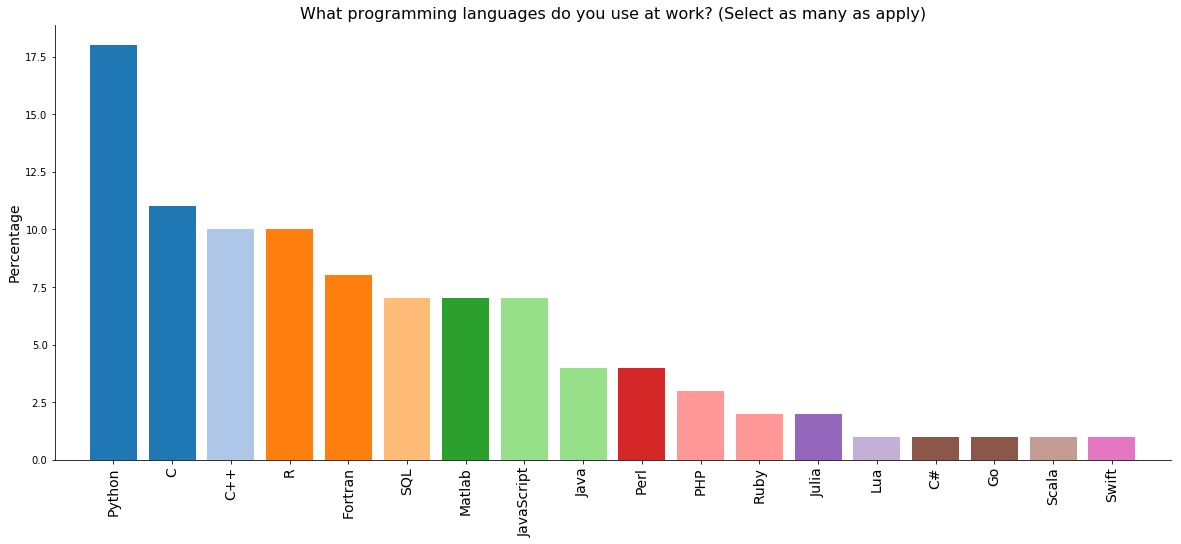

In [183]:
_ = get_plot(perc_to_count, "multiple choices")

### What Operating System do you prefer to use at work?

In [184]:
v_to_count, filename  = get_count(df, ['tool2. What Operating System do you prefer to use at work?'], "one choice", "./../survey_creation/2017/us/listAnswers/os.csv", "False", "./2017/us/output/")

In [185]:
perc_to_count = get_percentage(v_to_count, filename)

In [186]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What Operating System do you prefer to use at w...                   
GNU/Linux                                              72        54.0
OS X                                                   47        35.0
Windows                                                13        10.0
Other                                                   1         1.0
NaN                                                    31         NaN

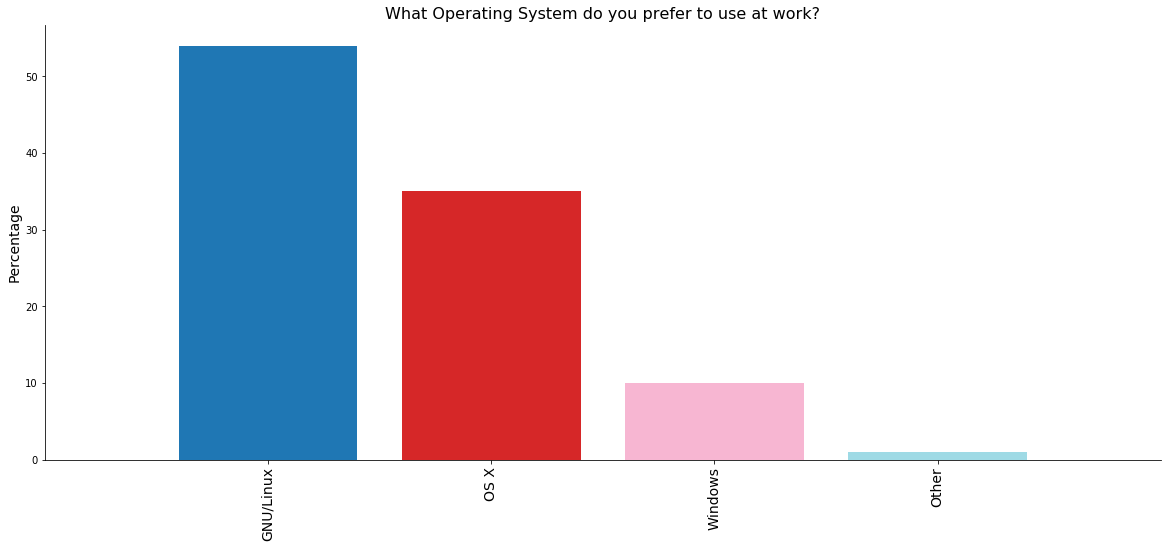

In [187]:
_ = get_plot(perc_to_count, "one choice")

# Section 9. Job satisfaction

The job satisfaction is an essential pulse to take about the community. It helps to track the evolution and the current state of the RSEs within their role and to catch any sign of structural or organisational dysfunction that are translated into well-being. There are a lot of different metrics to measure the quality of a job on a personal and psychological level [4]. Several models exist to understand the link between different factors of job satisfaction and turnover intention [5]–[9]. Turnover intention is an important measure that is highly associated with the risk of employees leaving the organisation [7]. Job satisfaction is important in retaining RSEs. Perceived employability provides information on how workers values their own skills in regard of the market. To measure the different attitudes toward the RSE role, we used scales that have been created in [5], [6], [8], [9]. These are Likert scale [10], which are 5 point ordinal scales graduated from Strongly disagree to Strongly agree. Each scale is composed of several so called items (i.e. questions) that each measure one attitude.

Beside these specific concepts we asked more general question about their satisfaction in their current position and their satisfaction with their career in general with a range of answers from *0 - Not at all satisfied* to *10 - Completely satisfied*, 80% of the participants answered more than 5 to the scale (which can be considered as a neutral position) to the question about their satisfaction about their current position. For the question about their satisfaction with their career in general (and using the same scale), 84% of the participants answered more than 5 to the scale.

The specific questions about their job satisfaction reflect, in general, the same opinion as the two more generic questions. However, the granularity helps to identify a couple of issues that would not appears with generic questions:

* *The feedback about the performance*: These questions ask if the RSEs feel that they receive enough information about their work and their performance. While they seems to have enough information about the purpose of their work and having access to sufficient data and information, they are less assertive about the feedback they receive from their colleagues and their supervisors.

* *The turnover intention*: These questions aim to measure the desire to quit their current position. Overall, the participants are not willing to leave their position and are not necessarily searching for other job, even if the potential job would offer the same compensations.

* *The perceived employability*: This concept is linked to the previous one. People may not have the intention to leave their jobs, not because they like it, but because they fear they are not employable. This is not the case here, the participants consider themselves more often employable than not.

* *The affective recognition*: This concept try to see if the participants receive positive feedback from their supervisors. Overall, again the participants report a positive relation with their supervisors. It means they are not systematic issues with direct management.

* *Affective satisfaction*: Here, the concept measures how much the participants enjoy and like their job. The answers were positive and again, reflect the answers given at the more generic questions.

* *The possibility of progression*: This question aims to study the possibility of evolution for the RSEs, if information is available and if they see a possibility of evolution within their current career. This is the only questions that clearly received negative answers. To summarise, even if the RSEs have planned to be in this position, as a part of their career plan, the majority of them think they cannot be promoted in their current group, neither the information for such progression is easily accessible.

## General satisfaction

### In general, how satisfied are you with [Your current position]; In general, how satisfied are you with [Your career]

In [188]:
v_to_count, filename  = get_count(df, ['likert3[satisgen1]. [In general, how satisfied are you with [Your current position]]', 'likert3[satisgen2]. [In general, how satisfied are you with [Your career]]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_satisfied_10.csv", "False", "./2017/us/output/")

In [189]:
display(v_to_count) 

Your current position  Your career
General satisfaction                                         
0 - Not at all satisfied                       3          1.0
1                                              1          NaN
2                                              7          3.0
3                                              4          7.0
4                                              1          3.0
5                                              8         13.0
6                                             11         17.0
7                                             36         23.0
8                                             30         38.0
9                                             28         20.0
10 - Completely satisfied                     12         16.0

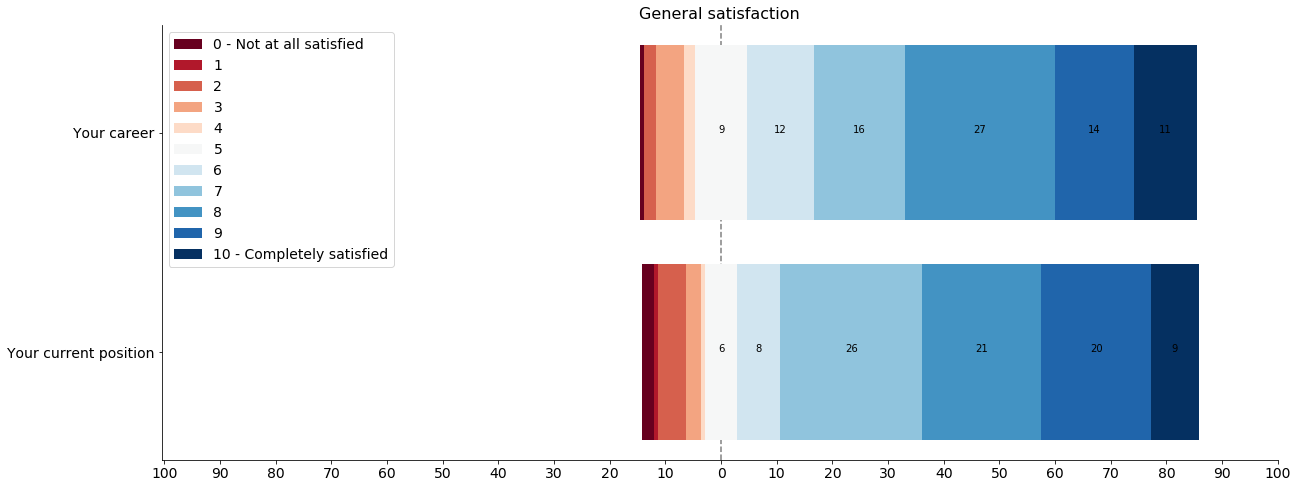

In [190]:
_ = get_plot(v_to_count, "likert")

## Feedback about performance

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [191]:
v_to_count, filename  = get_count(df, ['likert1[perfCheck1]. [Do you receive sufficient information on the results of your work?]', 'likert1[perfCheck2]. [Does your work give you the opportunity to check on how well you are doing your work?]', 'likert1[perfCheck3]. [In your work, do you have access to sufficient data and information?]', 'likert1[perfCheck4]. [Do you receive sufficient information on the purpose of your work?]', 'likert1[perfCheck5]. [Does your work provide you with direct feedback on how well you are doing your work?]', 'likert1[perfCheck6]. [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likert1[perfCheck7]. [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_time_5.csv", "False", "./2017/us/output/")

In [192]:
display(v_to_count) 

Do you receive sufficient information on the results of your work?  \
                                                                                 
Never                                                       3                    
Sometimes                                                  30                    
Often                                                      42                    
Very Often                                                 35                    
Always                                                     28                    

            Does your work give you the opportunity to check on how well you are doing your work?  \
                                                                                                    
Never                                                       8                                       
Sometimes                                                  39                                       
Often                                                      37                                       
Very Often                                                 30                                       
Always                                                     19                                       

            In your work, do you have access to sufficient data and information?  \
                                                                                   
Never                                                       2                      
Sometimes                                                  18                      
Often                                                      38                      
Very Often                                                 47                      
Always                                                     29                      

            Do you receive sufficient information on the purpose of your work?  \
                                                                                 
Never                                                       3                    
Sometimes                                                  15                    
Often                                                      13                    
Very Often                                                 51                    
Always                                                     57                    

            Does your work provide you with direct feedback on how well you are doing your work?  \
                                                                                                   
Never                                                      10                                      
Sometimes                                                  34                                      
Often                                                      39                                      
Very Often                                                 37                                      
Always                                                     18                                      

            Does your supervisor/line manager inform you about how well you are doing your work?  \
                                                                                                   
Never                                                      10                                      
Sometimes                                                  49                                      
Often                                                      38                                      
Very Often                                                 20                                      
Always                                                     16                                      

            Do your colleagues inform you about how well you are doing your work?  
                                                                               

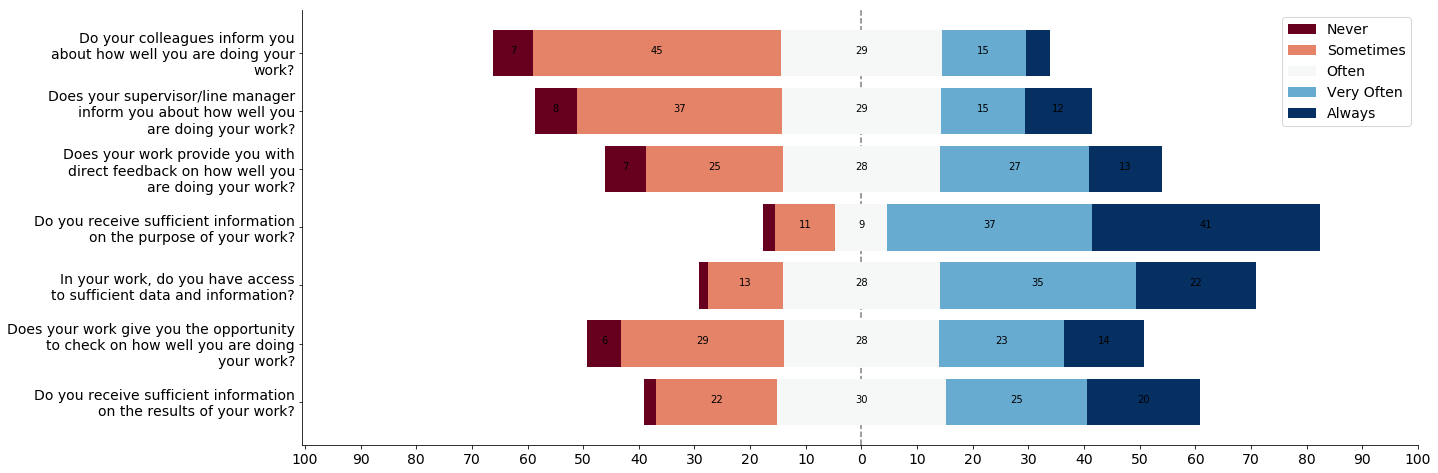

In [193]:
_ = get_plot(v_to_count, "likert")

## Turnover intention

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?; How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [194]:
v_to_count, filename  = get_count(df, ['likert1[turnOver1]. [How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?]', 'likert1[turnOver2]. [How often do you look forward to another day at work?]', 'likert1[turnOver3]. [How often do you consider leaving your job?]', 'likert1[turnOver4]. [How often do dream about getting another job that will better suit your needs?]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_time_5.csv", "False", "./2017/us/output/")

In [195]:
display(v_to_count) 

How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?  \
                                                                                                                           
Never                                                      32                                                              
Sometimes                                                  64                                                              
Often                                                      22                                                              
Very Often                                                  9                                                              
Always                                                      9                                                              

            How often do you look forward to another day at work?  \
                                                                    
Never                                                    23.0       
Sometimes                                                70.0       
Often                                                    46.0       
Very Often                                                NaN       
Always                                                    NaN       

            How often do you consider leaving your job?  \
                                                          
Never                                              35.0   
Sometimes                                          90.0   
Often                                              14.0   
Very Often                                          NaN   
Always                                              NaN   

            How often do dream about getting another job that will better suit your needs?  
                                                                                            
Never                                                      20                               
Sometimes                                                  65                               
Often                                                      18                               
Very Often                                                 18                               
Always                                                     14

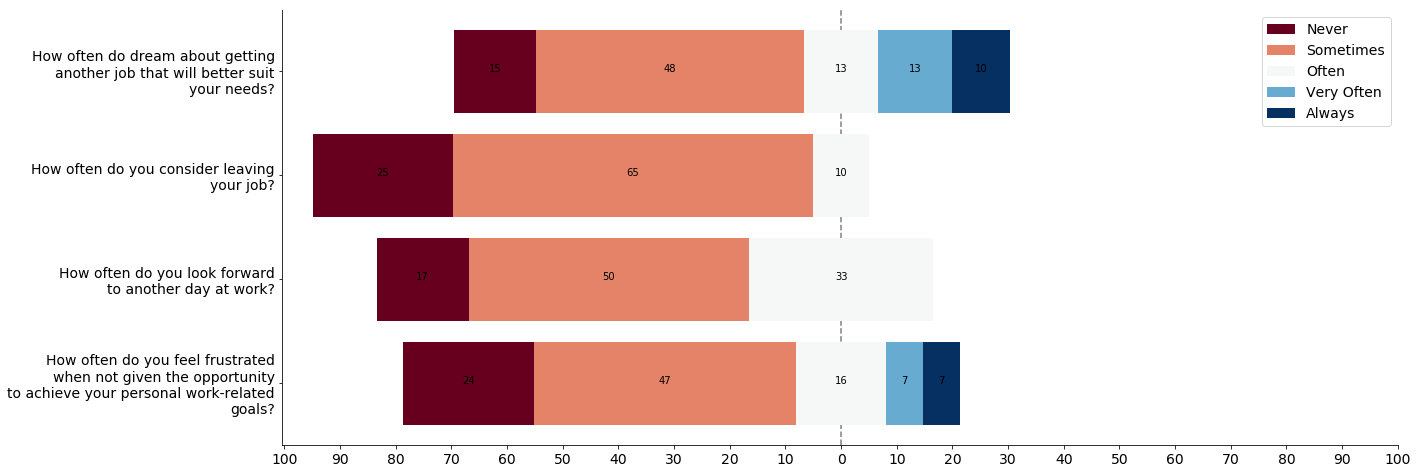

In [196]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [197]:
v_to_count, filename  = get_count(df, ['likert2[turnOver5]. [My current job satisfies my personal needs]', 'likert2[turnOver6]. [I would accept another job at the same compensation level if I was offered it]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_agree.csv", "False", "./2017/us/output/")

In [198]:
display(v_to_count) 

My current job satisfies my personal needs  \
                                                                        
Strongly disagree                                                   6   
Disagree                                                           10   
Neither agree or disagree                                          14   
Agree                                                              75   
Strongly Agree                                                     31   

                           I would accept another job at the same compensation level if I was offered it  
                                                                                                          
Strongly disagree                                                         20                              
Disagree                                                                  56                              
Neither agree or disagree                                                 40                              
Agree                                                                     16                              
Strongly Agree                                                             4

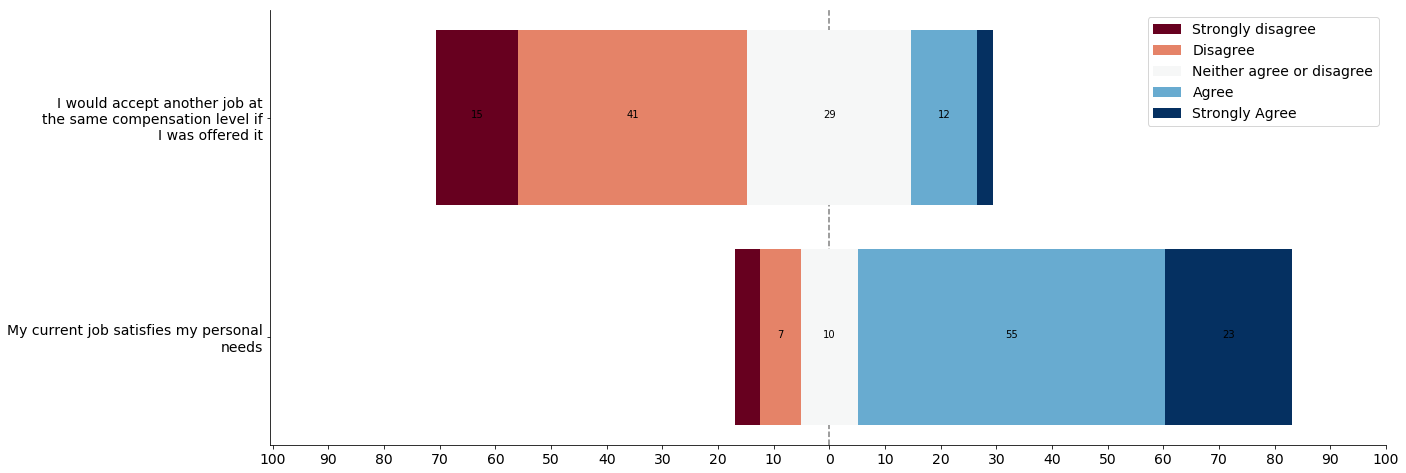

In [199]:
_ = get_plot(v_to_count, "likert")

## Perceived Employability

### It would not be very difficult for me to get an equivalent job in a different organization; I can think of a number of organizations that would probably offer me a job; My experience is in demand on the labor market; Given my qualifications and experience, getting a new job would not be very hard at all

In [200]:
v_to_count, filename  = get_count(df, ['likert2[percEmp1]. [It would not be very difficult for me to get an equivalent job in a different organization]', 'likert2[percEmp2]. [I can think of a number of organizations that would probably offer me a job]', 'likert2[percEmp3]. [My experience is in demand on the labor market]', 'likert2[percEmp4]. [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_agree.csv", "False", "./2017/us/output/")

In [201]:
display(v_to_count) 

It would not be very difficult for me to get an equivalent job in a different organization  \
                                                                                                                        
Strongly disagree                                                         10                                            
Disagree                                                                  28                                            
Neither agree or disagree                                                 33                                            
Agree                                                                     37                                            
Strongly Agree                                                            27                                            

                           I can think of a number of organizations that would probably offer me a job  \
                                                                                                         
Strongly disagree                                                          6                             
Disagree                                                                  18                             
Neither agree or disagree                                                 31                             
Agree                                                                     52                             
Strongly Agree                                                            28                             

                           My experience is in demand on the labor market  \
                                                                            
Strongly disagree                                                     NaN   
Disagree                                                              5.0   
Neither agree or disagree                                            19.0   
Agree                                                                67.0   
Strongly Agree                                                       44.0   

                           Given my qualifications and experience, getting a new job would not be very hard at all  
                                                                                                                    
Strongly disagree                                                          7                                        
Disagree                                                                   6                                        
Neither agree or disagree                                                 25                                        
Agree                                                                     63                                        
Strongly Agree                                                            34

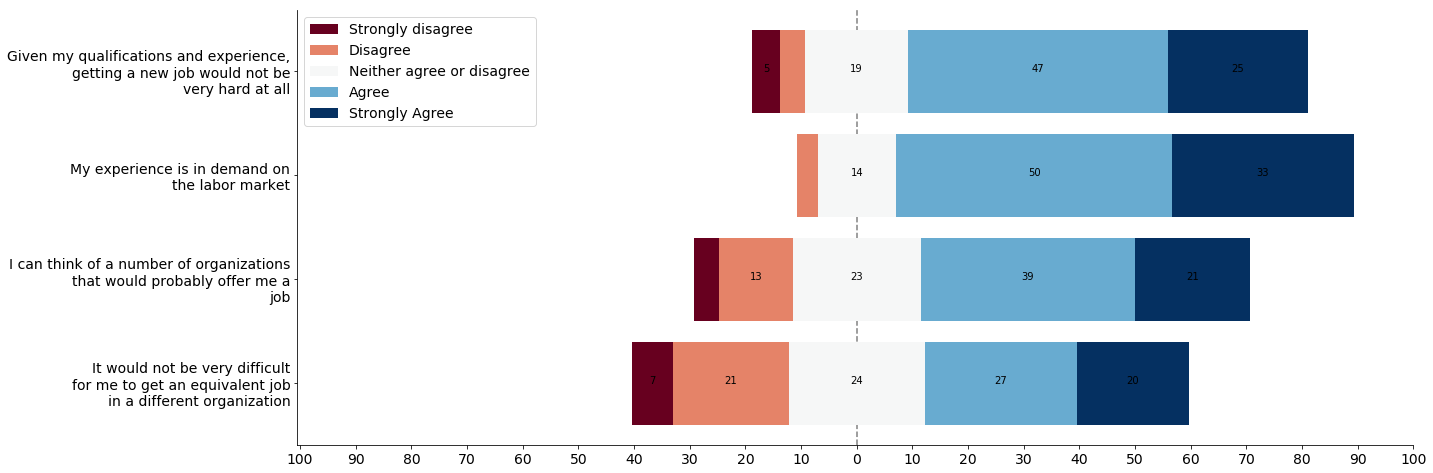

In [202]:
_ = get_plot(v_to_count, "likert")

## Affective recognition

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [203]:
v_to_count, filename  = get_count(df, ["likert2[affRec1]. [I am satisfied with my supervisor/line manager's confidence in me]", 'likert2[affRec2]. [I am satisfied with a word of thanks from my supervisor/line manager]', 'likert2[affRec3]. [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]', 'likert2[affRec4]. [I am satisfied with the compliments from my supervisor/line manager concerning my work]', 'likert2[affRec5]. [I am satisfied with the encouragement from my supervisor/line manager while doing my job]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_agree.csv", "False", "./2017/us/output/")

In [204]:
display(v_to_count) 

I am satisfied with my supervisor/line manager's confidence in me  \
Affective recognition                                                                          
Strongly disagree                                                          3                   
Disagree                                                                   9                   
Neither agree or disagree                                                 21                   
Agree                                                                     58                   
Strongly Agree                                                            42                   

                           I am satisfied with a word of thanks from my supervisor/line manager  \
Affective recognition                                                                             
Strongly disagree                                                          6                      
Disagree                                                                  10                      
Neither agree or disagree                                                 30                      
Agree                                                                     63                      
Strongly Agree                                                            24                      

                           I am satisfied with the recognition I receive from my supervisor/line manager for doing my job  \
Affective recognition                                                                                                       
Strongly disagree                                                          9                                                
Disagree                                                                  22                                                
Neither agree or disagree                                                 21                                                
Agree                                                                     54                                                
Strongly Agree                                                            26                                                

                           I am satisfied with the compliments from my supervisor/line manager concerning my work  \
Affective recognition                                                                                               
Strongly disagree                                                          7                                        
Disagree                                                                  17                                        
Neither agree or disagree                                                 27                                        
Agree                                                                     54                                        
Strongly Agree                                                            27                                        

                           I am satisfied with the encouragement from my supervisor/line manager while doing my job  
Affective recognition                                                                                                
Strongly disagree                                                          8                                         
Disagree                                                                  20                                         
Neither agree or disagree                                                 23                                         
Agree                                                                     58                                         
Strongly Agree                                                            24

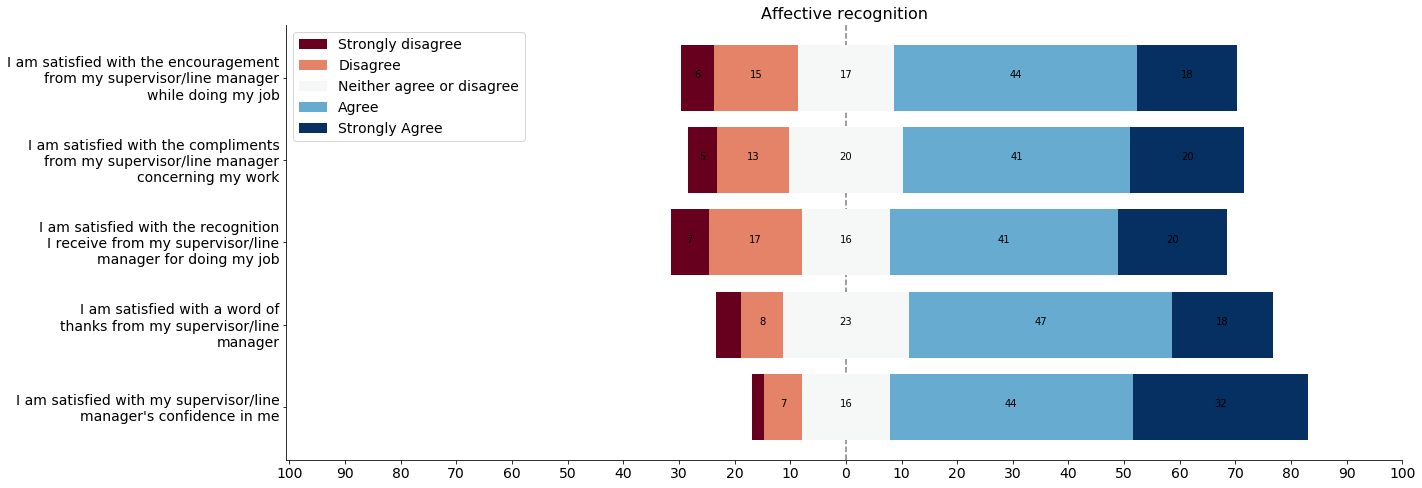

In [205]:
_ = get_plot(v_to_count, "likert")

## Affective satisfaction

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job; I like my job better than the average person

In [206]:
v_to_count, filename  = get_count(df, ['likert2[affSat1]. [I find real enjoyment in my job]', 'likert2[affSat2]. [Most days I am enthusiastic about my job]', 'likert2[affSat3]. [I feel fairly well satisfied with my job]', 'likert2[affSat4]. [I like my job better than the average person]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_agree.csv", "False", "./2017/us/output/")

In [207]:
display(v_to_count) 

I find real enjoyment in my job  \
                                                             
Strongly disagree                                        3   
Disagree                                                 4   
Neither agree or disagree                               15   
Agree                                                   74   
Strongly Agree                                          41   

                           Most days I am enthusiastic about my job  \
                                                                      
Strongly disagree                                                 3   
Disagree                                                          4   
Neither agree or disagree                                        20   
Agree                                                            69   
Strongly Agree                                                   41   

                           I feel fairly well satisfied with my job  \
                                                                      
Strongly disagree                                                 3   
Disagree                                                         10   
Neither agree or disagree                                        15   
Agree                                                            76   
Strongly Agree                                                   33   

                           I like my job better than the average person  
                                                                         
Strongly disagree                                                     3  
Disagree                                                              5  
Neither agree or disagree                                            18  
Agree                                                                68  
Strongly Agree                                                       38

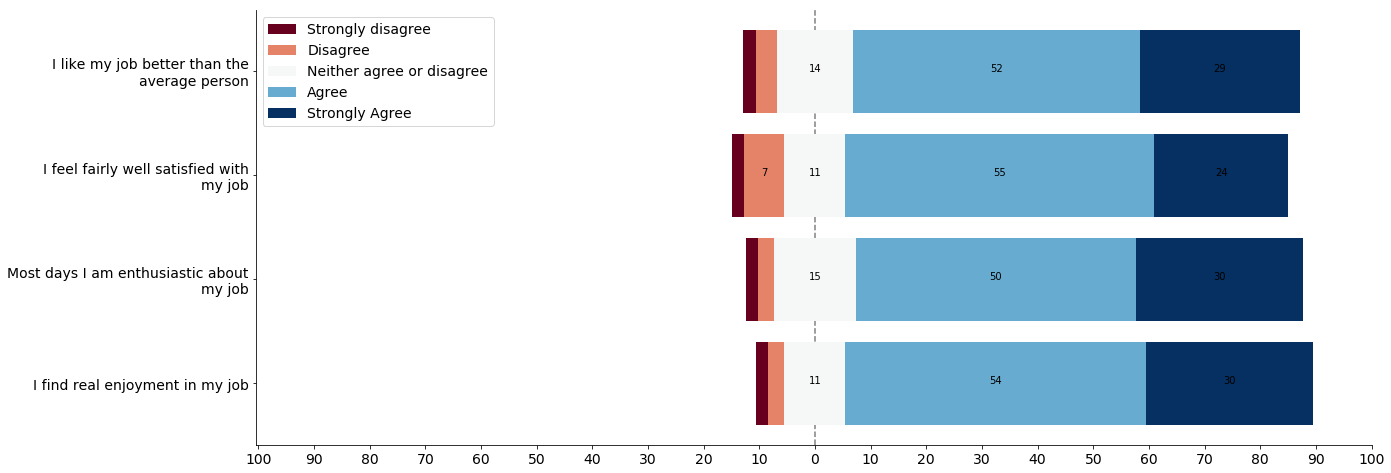

In [208]:
_ = get_plot(v_to_count, "likert")

## Possibility of progression

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan; My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [209]:
v_to_count, filename  = get_count(df, ['likert2[progRSE1]. [It is likely that I will gain a promotion within my current group]', 'likert2[progRSE2]. [The process I have to complete to gain a promotion is clear and understandable]', 'likert2[progRSE3]. [There are many opportunities within my chosen career plan]', 'likert2[progRSE4]. [My current position is an integral part of my career plan]', 'likert2[progRSE5]. [It is likely that my next position will be an RSE role]'], "likert", "./../survey_creation/2017/us/listAnswers/likert_agree.csv", "False", "./2017/us/output/")

In [210]:
display(v_to_count) 

It is likely that I will gain a promotion within my current group  \
                                                                                               
Strongly disagree                                                         29                   
Disagree                                                                  33                   
Neither agree or disagree                                                 34                   
Agree                                                                     24                   
Strongly Agree                                                            12                   

                           The process I have to complete to gain a promotion is clear and understandable  \
                                                                                                            
Strongly disagree                                                         33                                
Disagree                                                                  35                                
Neither agree or disagree                                                 34                                
Agree                                                                     17                                
Strongly Agree                                                            10                                

                           There are many opportunities within my chosen career plan  \
                                                                                       
Strongly disagree                                                         10           
Disagree                                                                  25           
Neither agree or disagree                                                 33           
Agree                                                                     43           
Strongly Agree                                                            24           

                           My current position is an integral part of my career plan  \
                                                                                       
Strongly disagree                                                          5           
Disagree                                                                  12           
Neither agree or disagree                                                 27           
Agree                                                                     49           
Strongly Agree                                                            41           

                           It is likely that my next position will be an RSE role  
                                                                                   
Strongly disagree                                                         13       
Disagree                                                                  14       
Neither agree or disagree                                                 39       
Agree                                                                     45       
Strongly Agree                                                            18

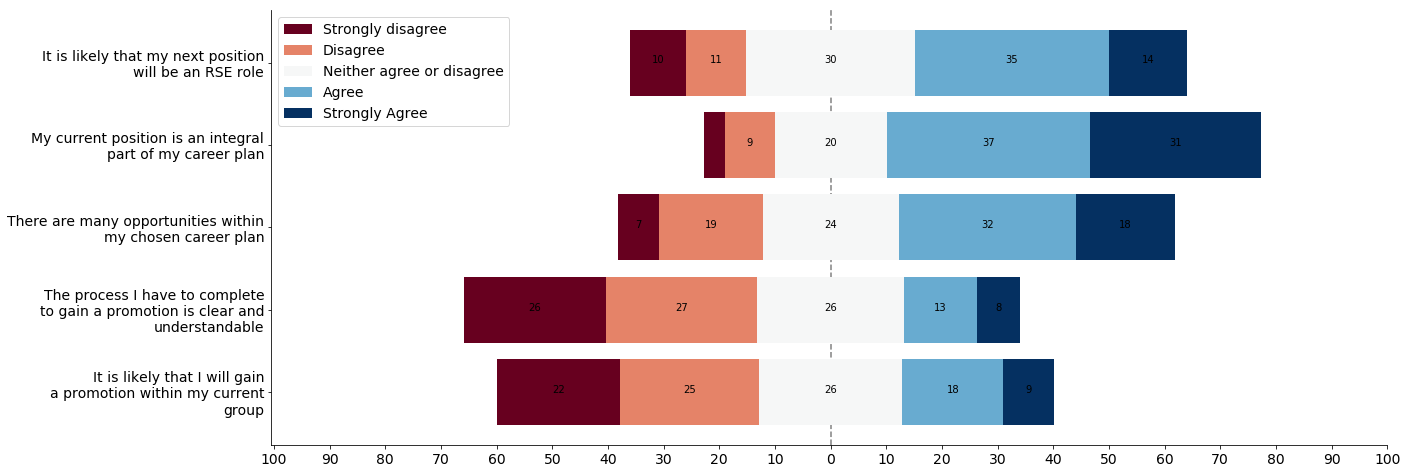

In [211]:
_ = get_plot(v_to_count, "likert")

# Section 10. Research Software Engineer

This last section regroups different questions about RSEs in general, the specific skills for them, where they meet other RSEs and if they are part of the UK RSE Association. 

About the skills we asked them what type of skills are important to become a RSE and how they did learn them. Both questions are displayed as wordcloud and the list of the different answers. 

The last section was about the RSE network, specific to USA. It appears that the network is not really efficient yet. First, to the question where they meet other RSE, only 20% of them chose between the different propositions, with a higher number in local RSE group (18%) which is normal knowing that only 6% are members of the UK RSE Association. 

## Skills

### What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.

In [212]:
data = df['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'].dropna()
data = [z.replace('/', ',').replace(';', ',').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
print('There are {} propositions'.format(len(data)))

There are 244 propositions


In [213]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4 and k[1] > 1:
        print(k[0].title(), k[1])

Machine Learning 9
Statistics 6
Time Management 5
Python 5
Communication 4
Networking 4
Project Management 4
Testing 3
Containers 3
Teaching 3
Writing 2
Continuous Integration 2
Automated Testing 2
Visualization 2
Deep Learning 2
Project 2
Public Speaking 2


(-0.5, 1499.5, 799.5, -0.5)

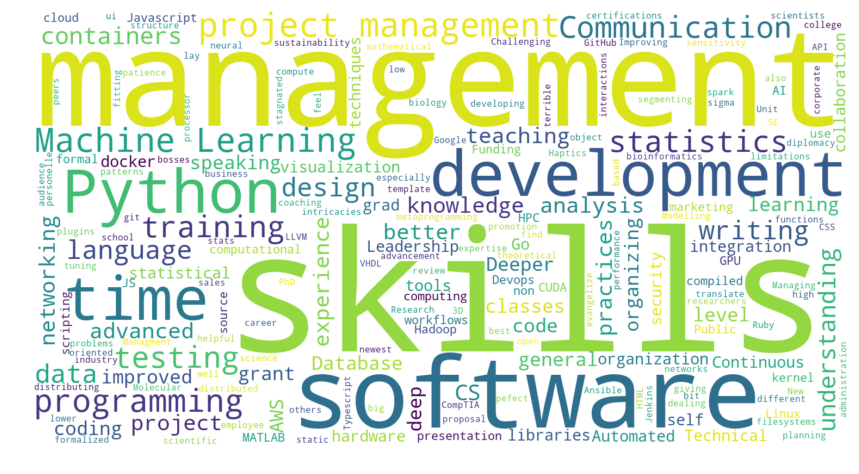

In [214]:
wc = wordcloud(df, ['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### How did you learn the skills you need to become an RSE?

In [215]:
data = df['ukrse3. How did you learn the skills you need to become an RSE?'].dropna()
data = [z.replace('/', ',').replace(';', ',').replace('-', ' ').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
print('There are {} propositions'.format(len(data)))

There are 186 propositions


In [216]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4 and k[1] > 1:
        print(k[0].title(), k[1])

Self Taught 25
On The Job 6
Mostly Self Taught 4
On My Own 2
Internet 2
Documentation 2
Self Study 2
Graduate School 2


(-0.5, 1499.5, 799.5, -0.5)

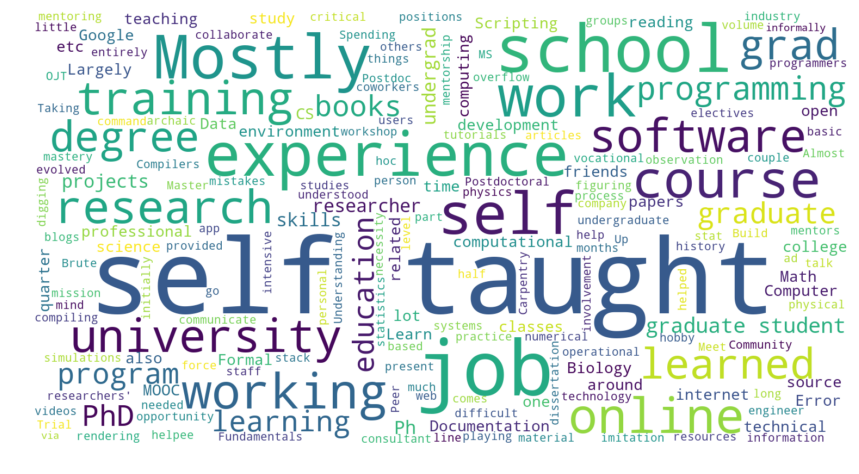

In [217]:
wc = wordcloud(df, ['ukrse3. How did you learn the skills you need to become an RSE?'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## RSE Network

### How do you meet other RSEs?

In [218]:
v_to_count, filename  = get_count(df, ['ukrse2[1]. How do you meet other RSEs? [UK RSE Association]', 'ukrse2[2]. How do you meet other RSEs? [Local RSE group/network]', 'ukrse2[3]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../survey_creation/2017/us/listAnswers/ukrse.csv", "False", "./2017/us/output/")

In [219]:
perc_to_count = get_percentage(v_to_count, filename)

In [220]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How do you meet other RSEs?                   
N/A                             87        80.0
Local RSE group/network         20        18.0
UK RSE Association               2         2.0

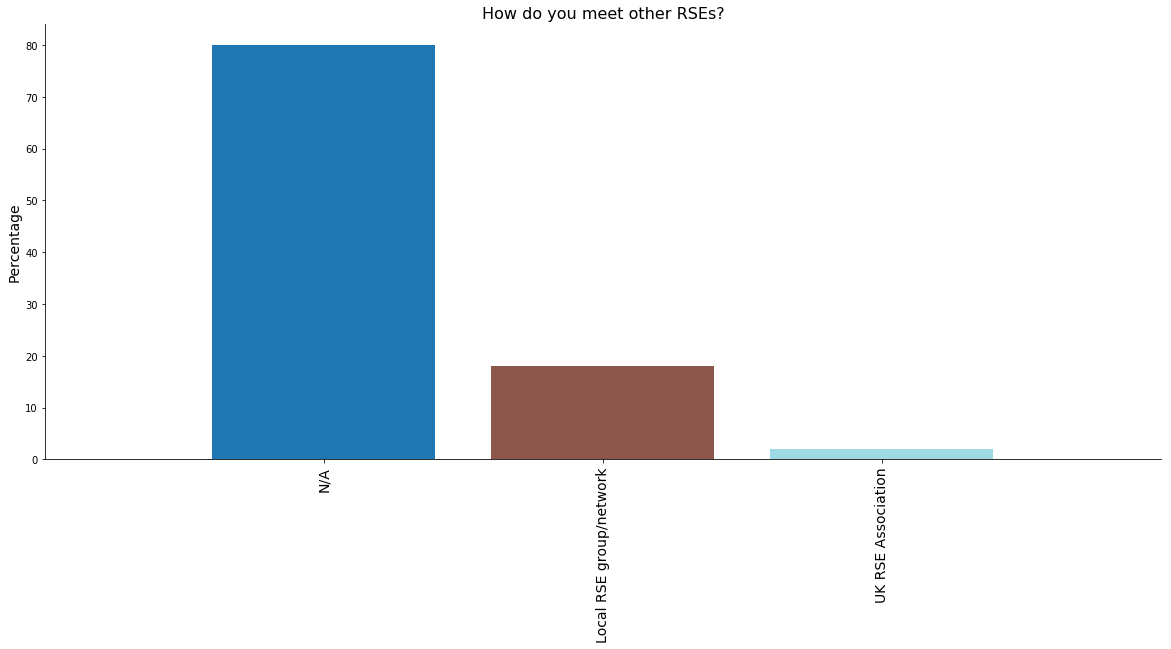

In [221]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)

In [222]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)'], "y/n/na", "./../survey_creation/2017/us/listAnswers/.csv", "False", "./2017/us/output/")

In [223]:
perc_to_count = get_percentage(v_to_count, filename)

In [224]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Are you a member of the UK RSE Association? (Me...                            
 Are you a member of the UK RSE Association? (M...            8         131   

                                                    NaN value  \
Are you a member of the UK RSE Association? (Me...              
 Are you a member of the UK RSE Association? (M...         25   

                                                    Yes [Percentage]  \
Are you a member of the UK RSE Association? (Me...                     
 Are you a member of the UK RSE Association? (M...               6.0   

                                                    No [Percentage]  
Are you a member of the UK RSE Association? (Me...                   
 Are you a member of the UK RSE Association? (M...             94.0

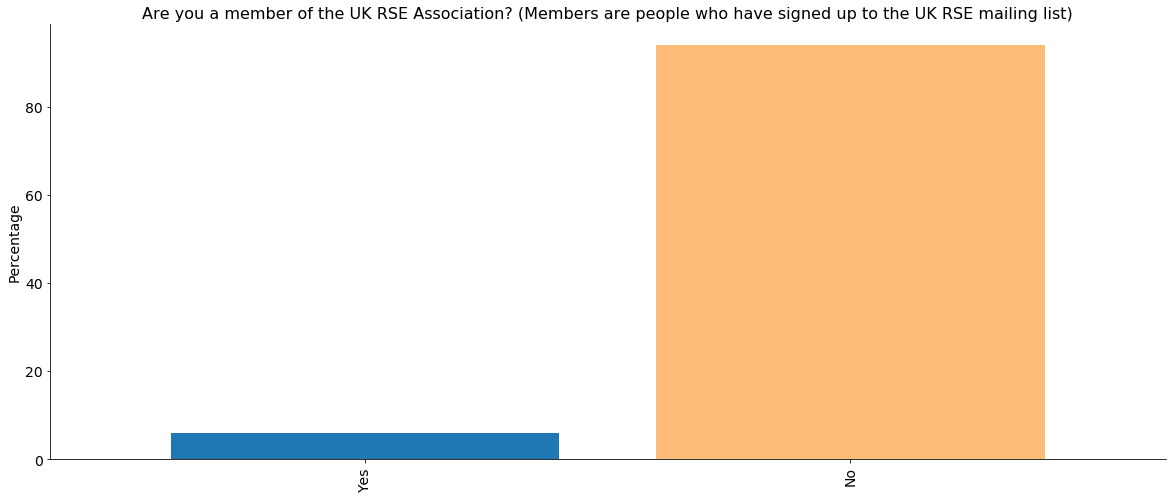

In [225]:
_ = get_plot(perc_to_count, "y/n/na")